In [1]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset

df=pd.read_csv("Customer_Retention.csv")

In [3]:
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
#Pre-processing column names


from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Gender of respondent                                                                                       269 non-null    object
 1   How old are you?                                                                                           269 non-null    object
 2   Which city do you shop online from?                                                                        269 non-null    object
 3   What is the Pin Code of where you shop online from?                                                        269 non-null    int64 
 4   Since How Long You are Shopping Online ?                                        

In [123]:
df.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

In [86]:
df.describe()

What is the Pin Code of where you shop online from?
count                                         269.000000  
mean                                       220465.747212  
std                                        140524.341051  
min                                        110008.000000  
25%                                        122018.000000  
50%                                        201303.000000  
75%                                        201310.000000  
max                                        560037.000000

In [7]:
df.isnull().sum().sum()


0

In [9]:
#Analyzing Continuous Features
df_cont=df.select_dtypes(include=["int64"])

In [10]:
c1=df_cont.columns.values

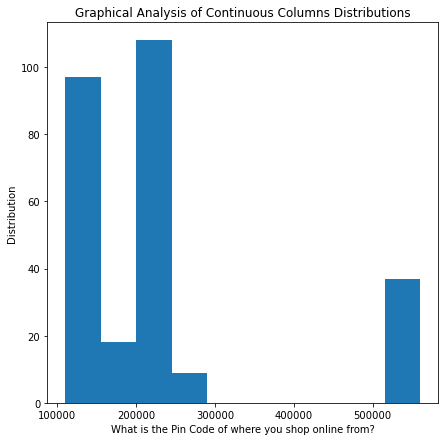

In [11]:
for i in c1:
    plt.figure(figsize=(7,7))
    plt.hist(df_cont[i])
    plt.xlabel(i)
    plt.ylabel("Distribution")
    plt.title("Graphical Analysis of Continuous Columns Distributions")
    plt.show()
    

In [38]:
#Analyzing Categorical Features
df_cat=df.select_dtypes(include=["object"])

In [39]:
df_cat

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
..                   ...                 ...   
264               Female         21-30 years   
265               Female         31-40 years   
266               Female         41-50 yaers   
267               Female  Less than 20 years   
268               Female         41-50 yaers   

    Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
..                                  ...   
264                               Solan   
265                           Ghaziabad   
266                          Bangalore    
267                               Solan   
268                           Ghaziabad   

    Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   
..                                       ...   
264                                1-2 years   
265                                1-2 years   
266                                2-3 years   
267                                2-3 years   
268                                2-3 years   

    How many times you have made an online purchase in the past  year?  \
0                                          31-40 times                   
1                                   41 times and above                   
2                                   41 times and above                   
3                                   Less than 10 times                   
4                                          11-20 times                   
..                                                 ...                   
264                                 Less than 10 times                   
265                                        31-40 times                   
266                                 Less than 10 times                   
267                                 Less than 10 times                   
268                                        31-40 times                   

    How do you access the internet while shopping on-line?  \
0                                              Dial-up       
1                                                Wi-Fi       
2                                      Mobile Internet       
3                                      Mobile Internet       
4                                                Wi-Fi       
..                                                 ...       
264                                    Mobile Internet       
265                                    Mobile Internet       
266                                    Mobile internet       
267                                              Wi-Fi       
268                                    Mobile Internet       

    Which device do you use to access the online shopping?  \
0                                              Desktop       
1                                           Smartphone       
2                                           Smartphone       
3                                           Smartphone       
4                                           Smartphone       
..                                                 ...       
264                                         Smartphone       
265                                         Smartphone       
266                                             Laptop       
267                                         Smartphone       
268              

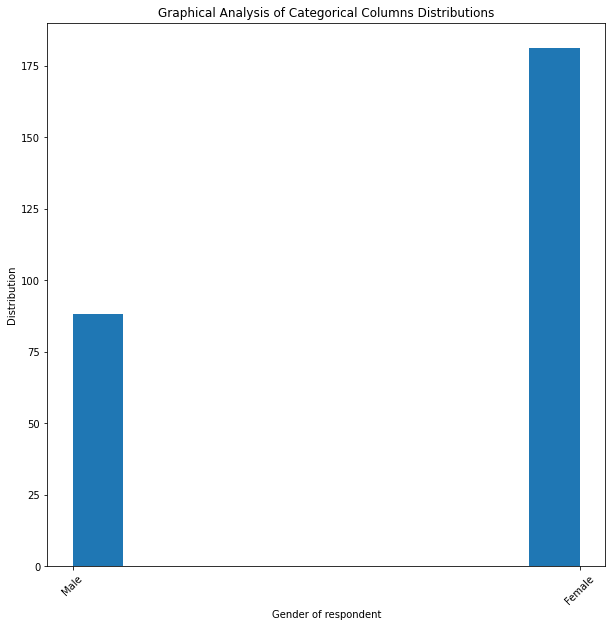

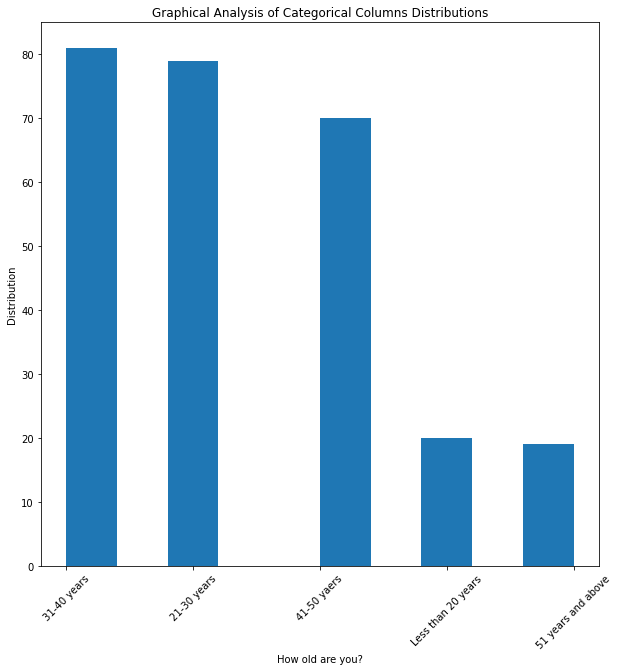

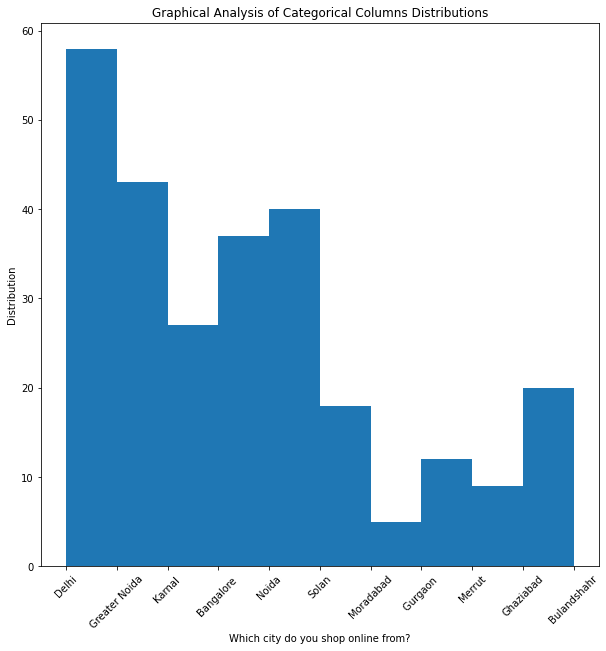

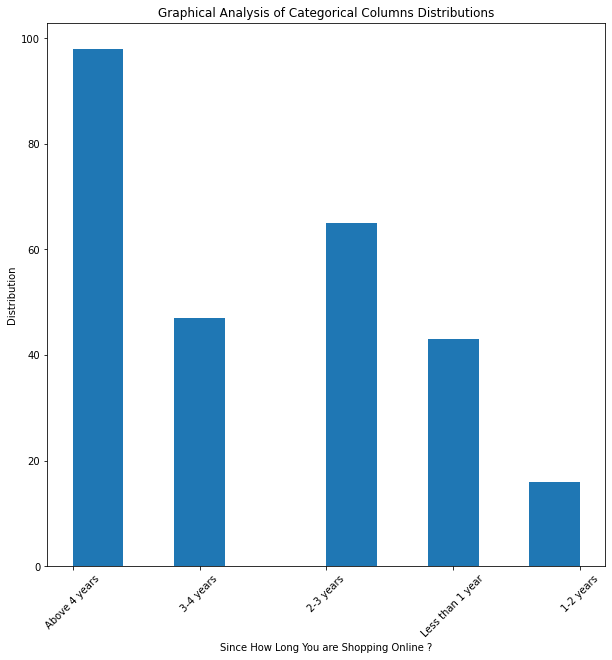

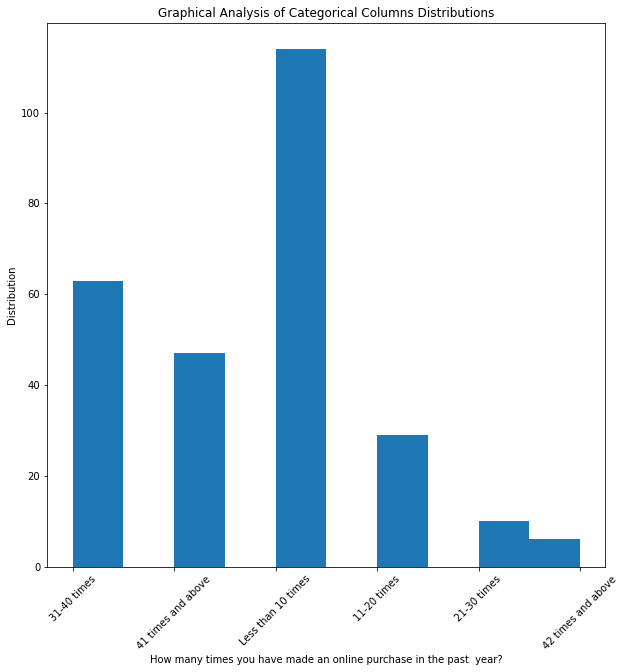

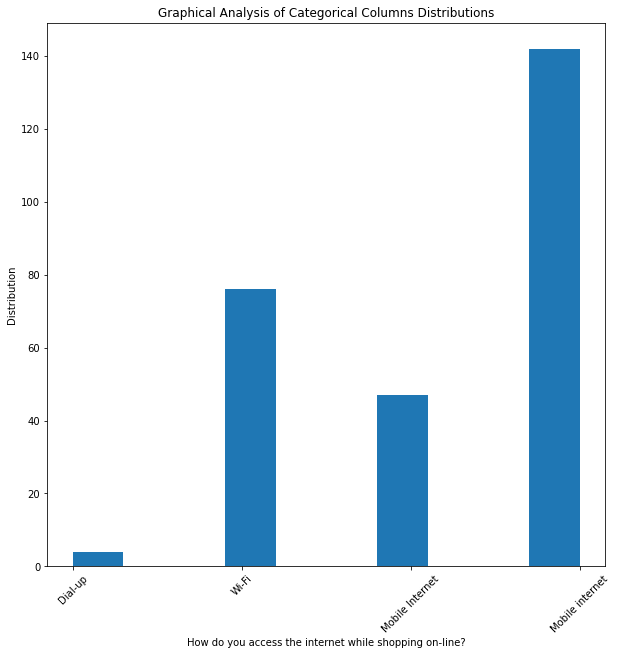

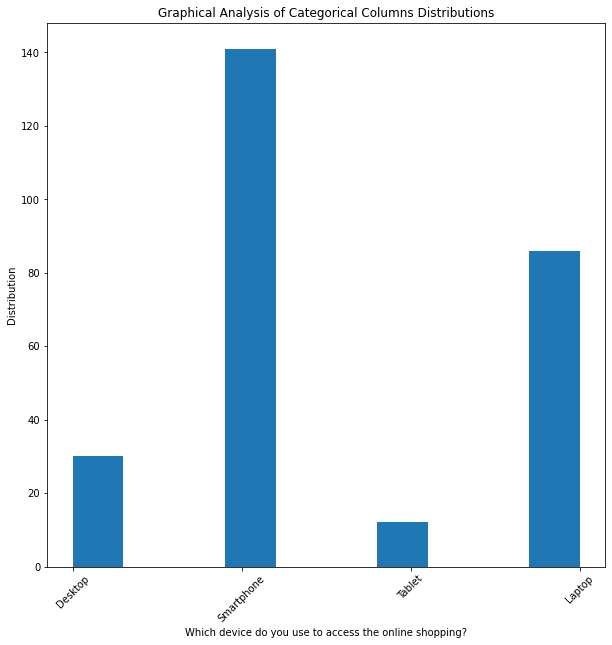

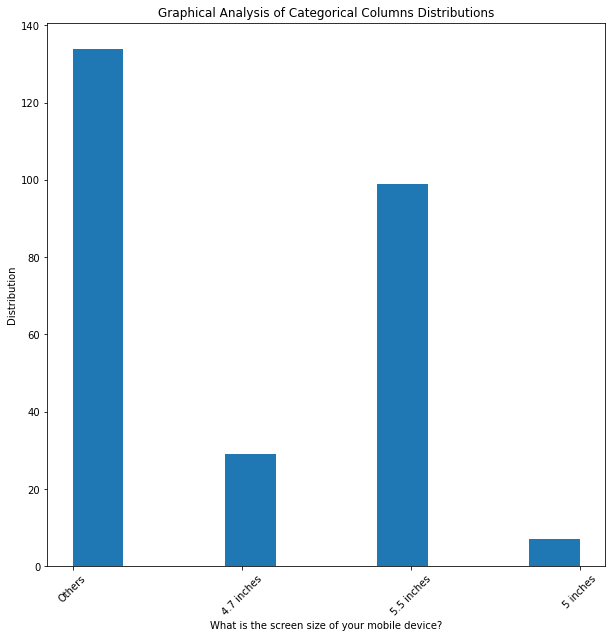

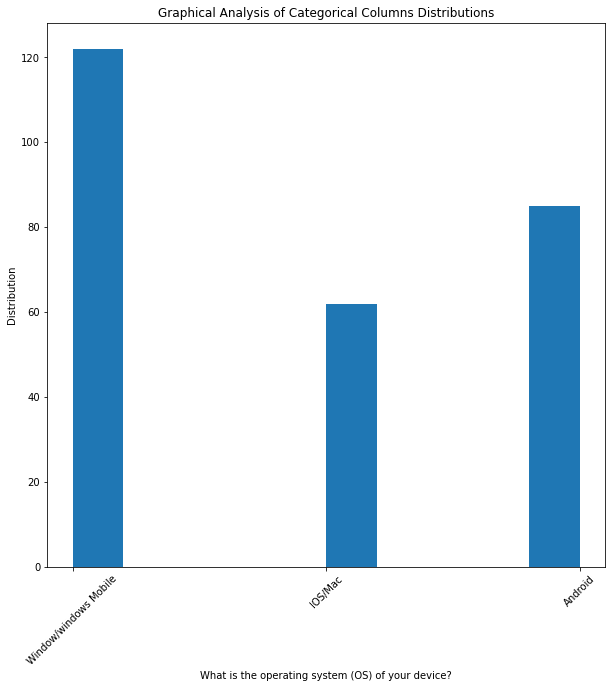

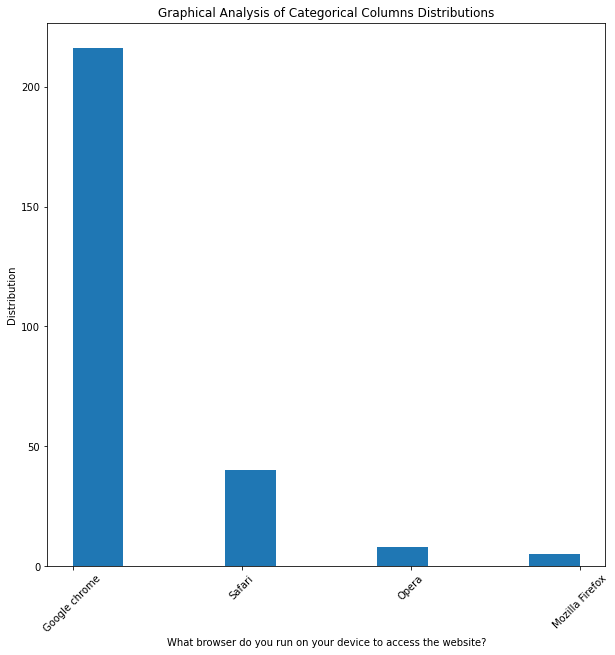

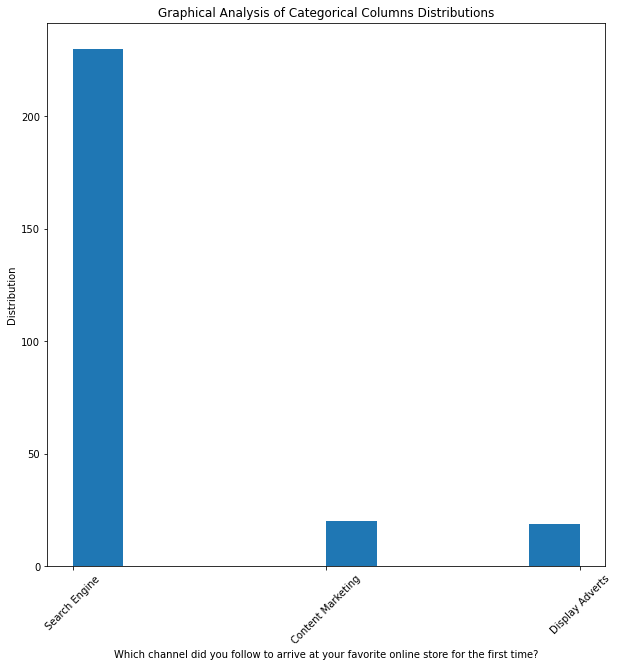

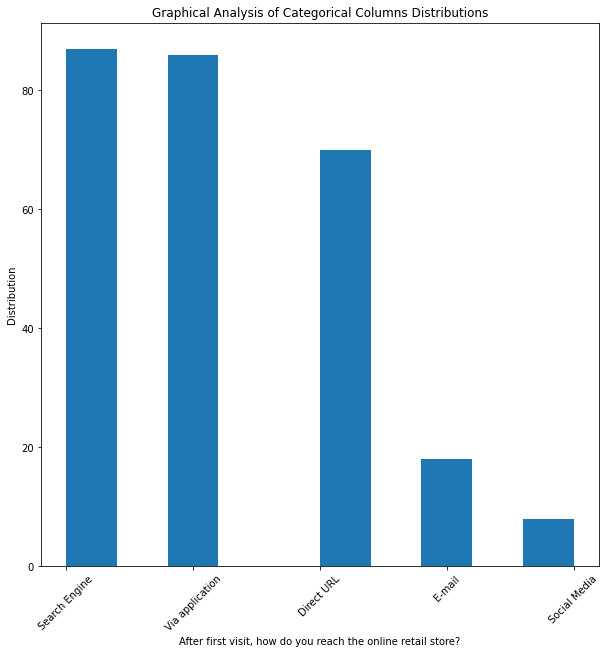

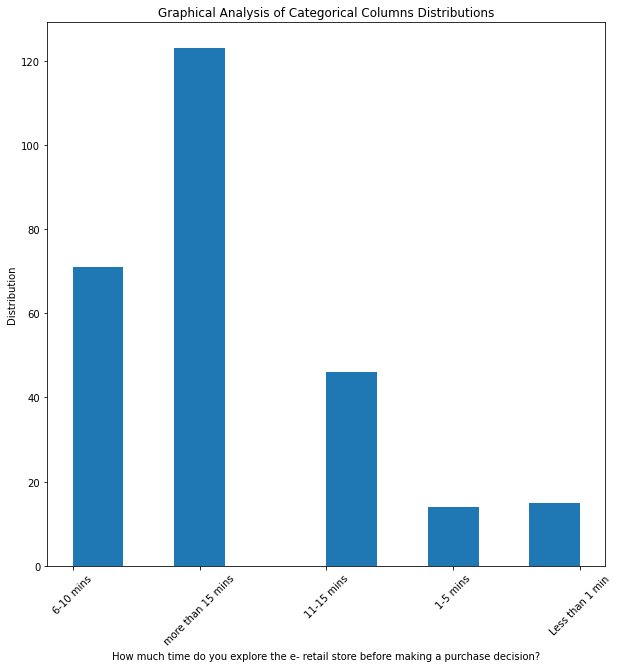

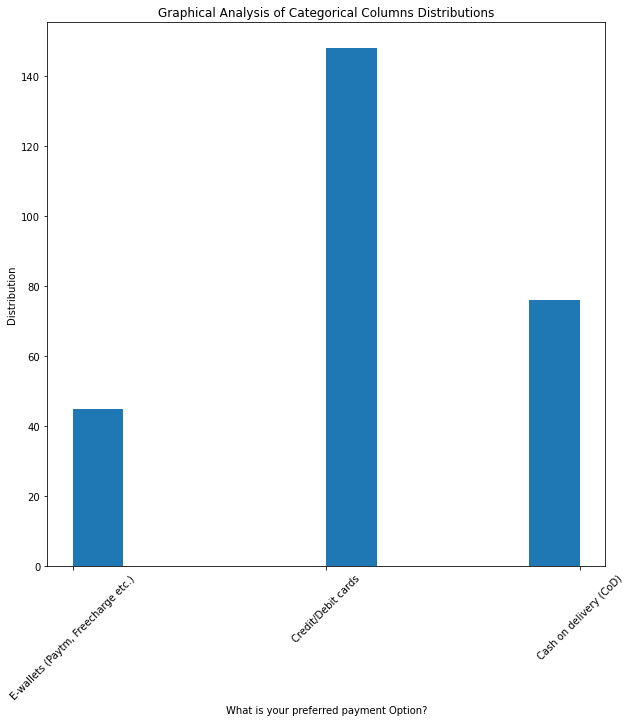

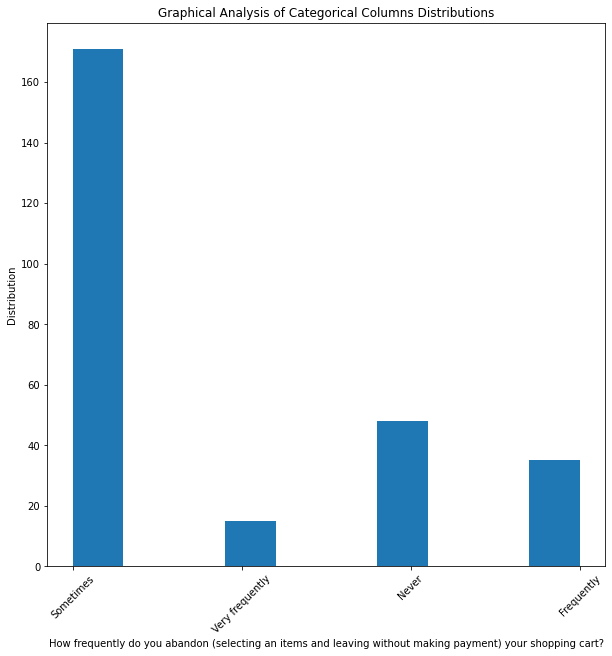

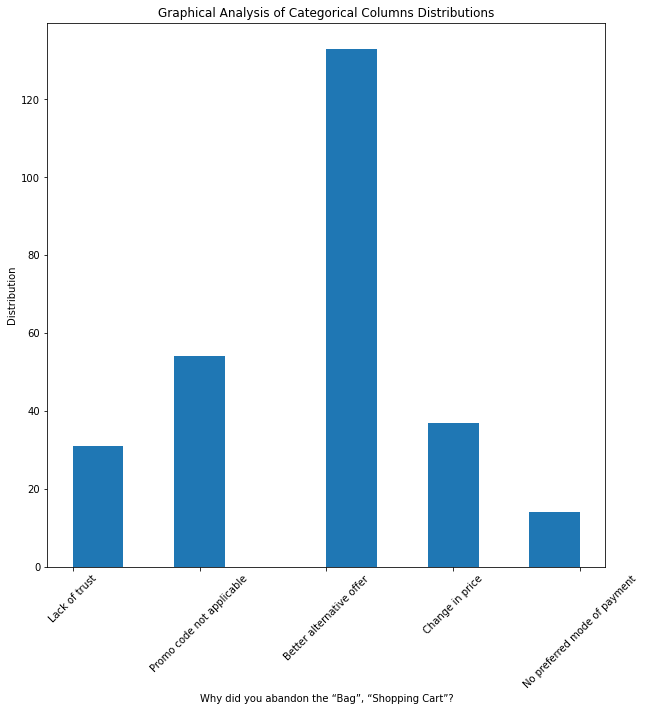

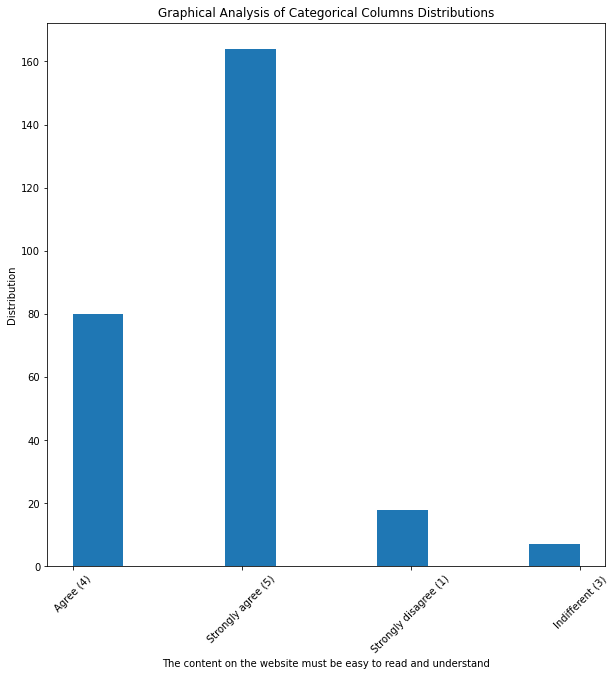

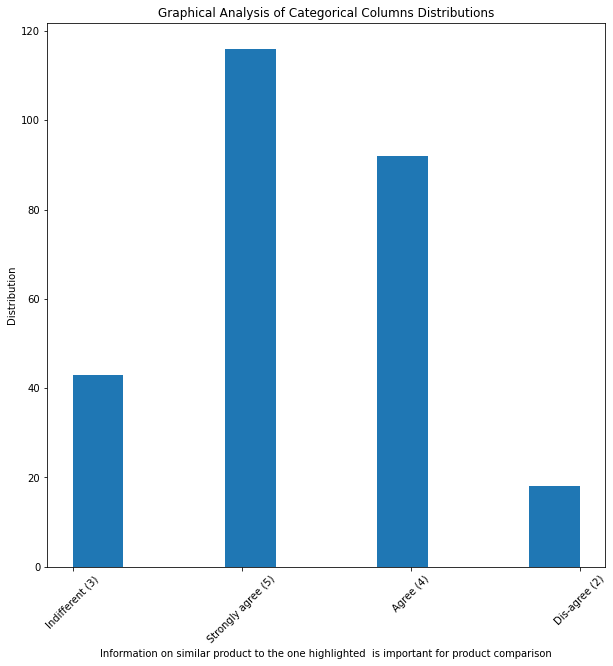

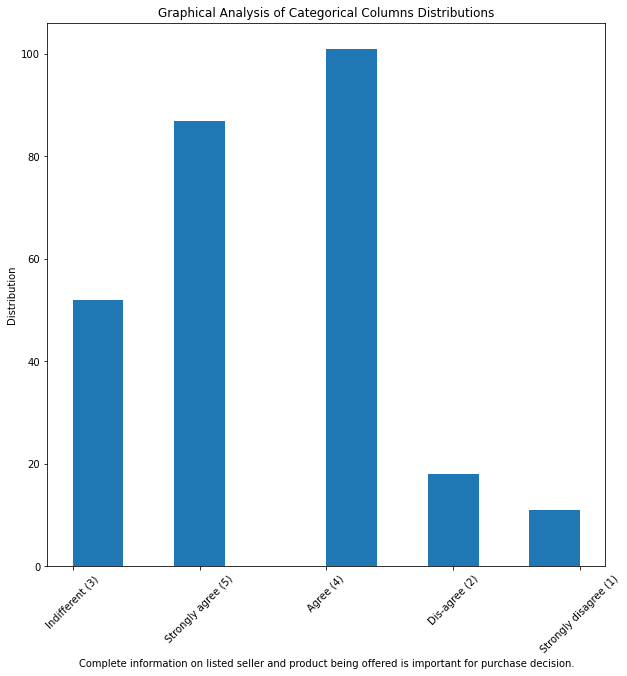

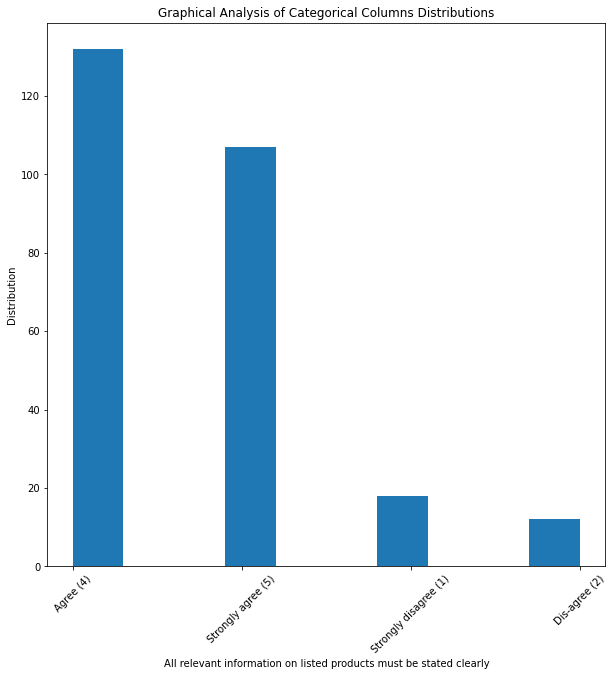

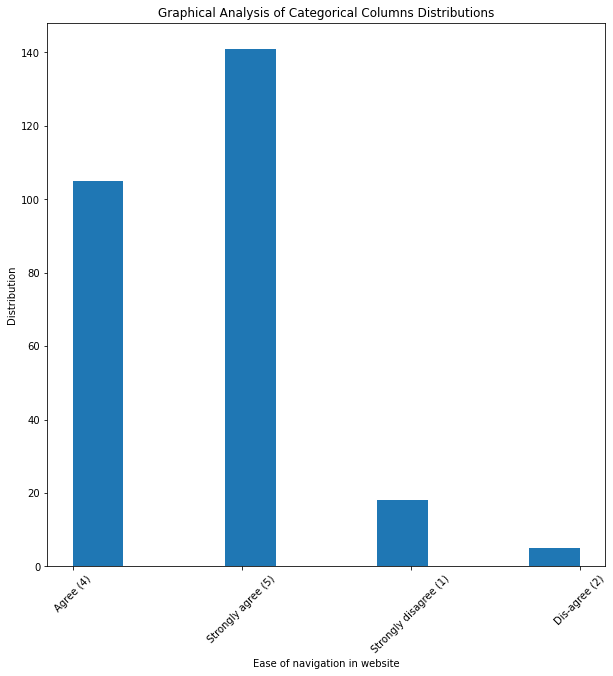

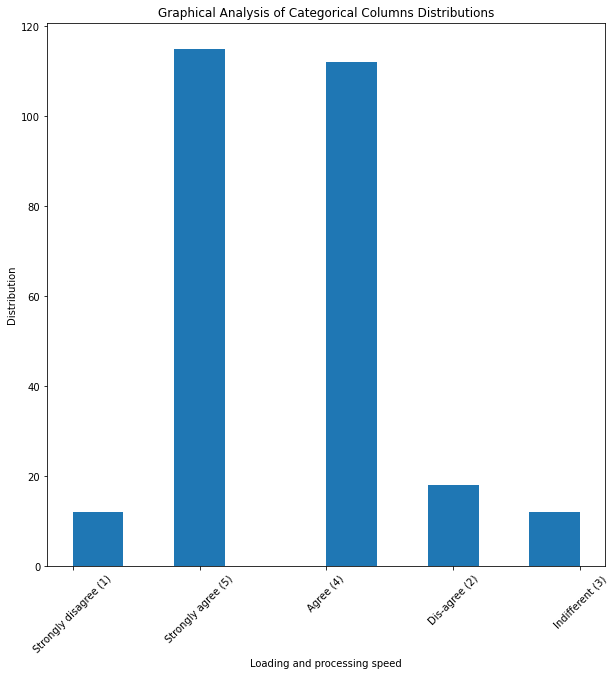

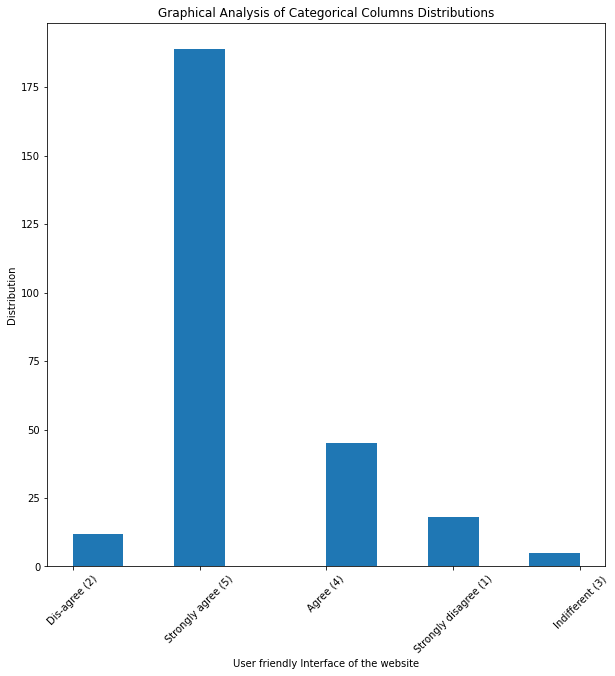

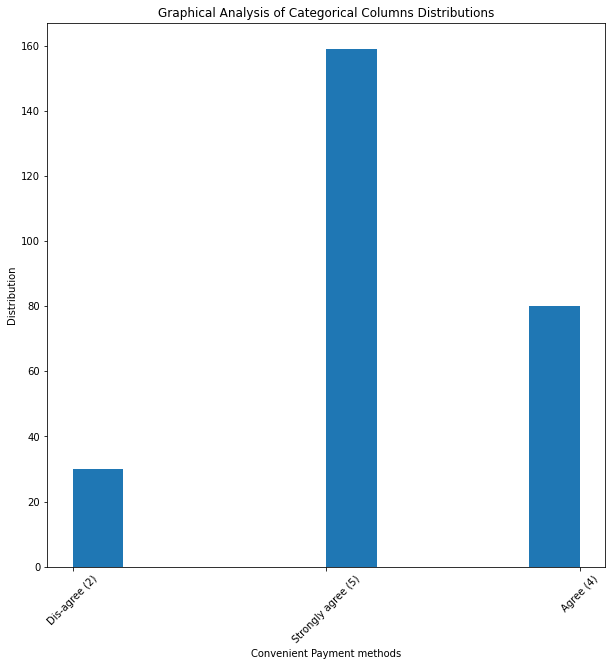

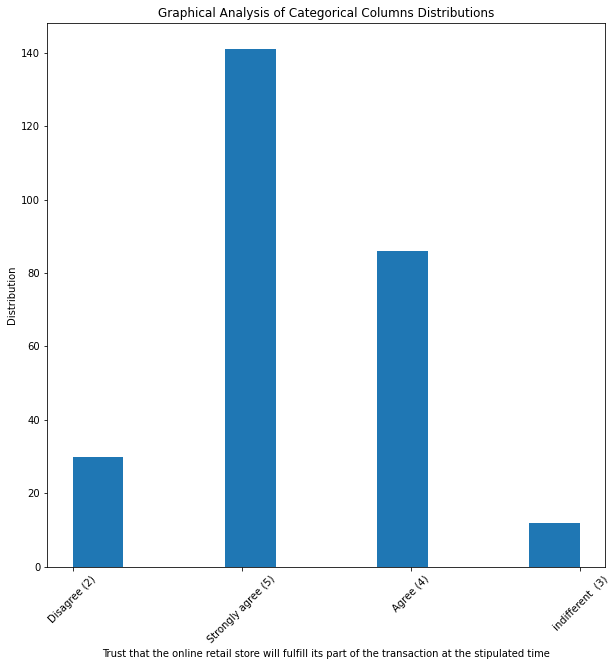

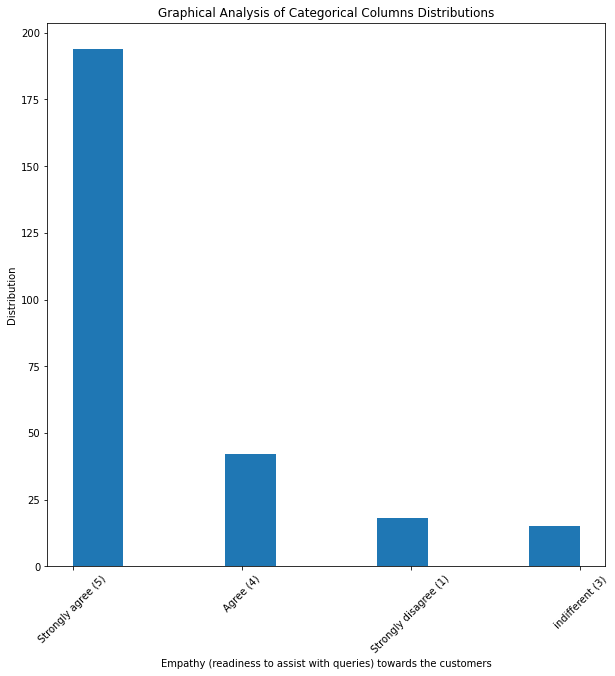

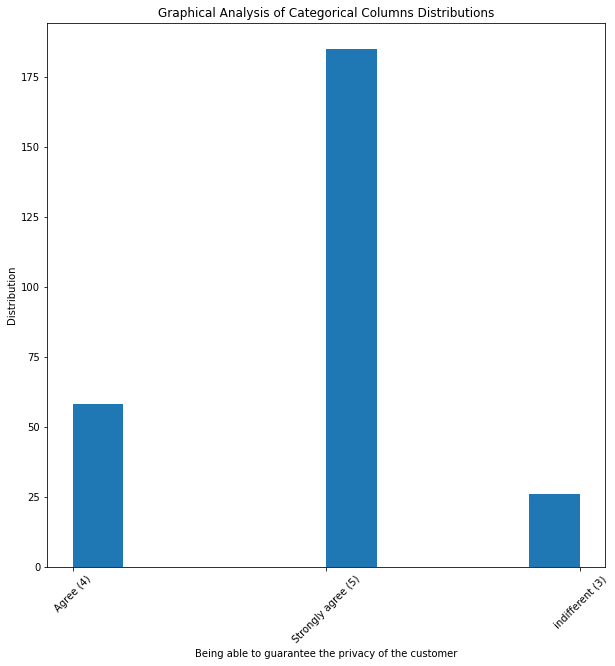

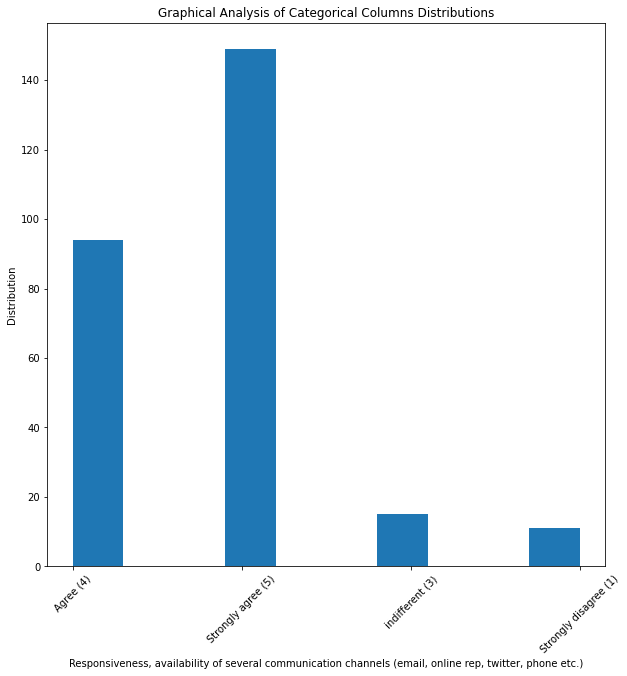

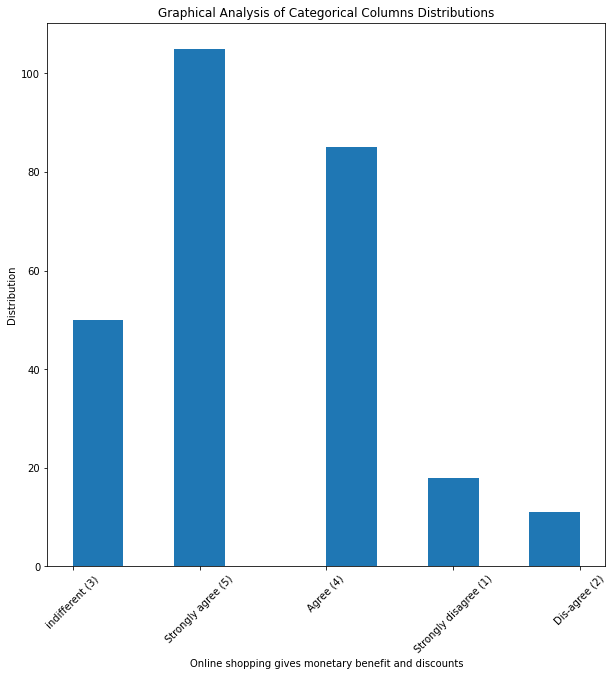

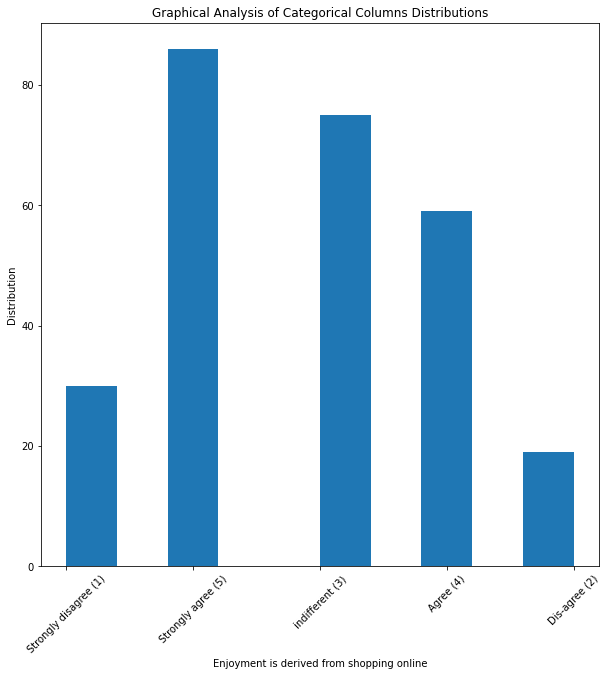

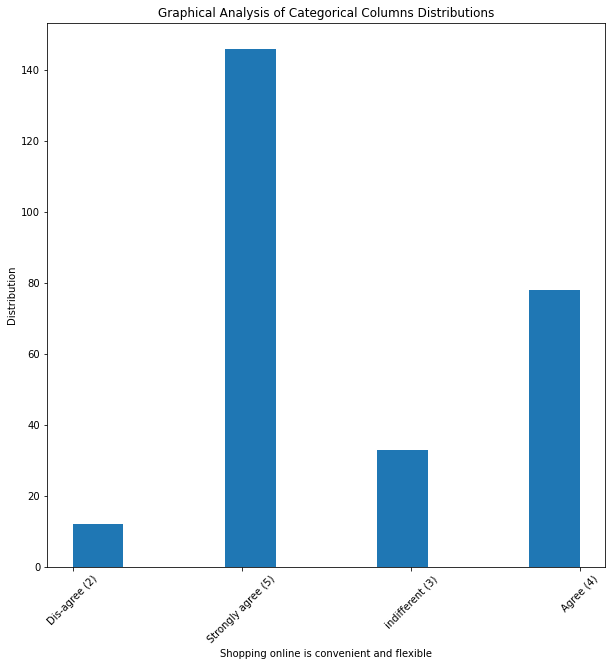

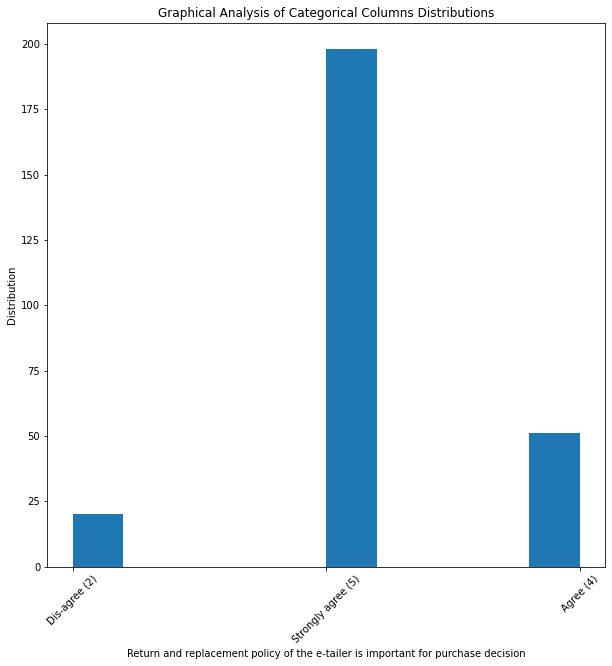

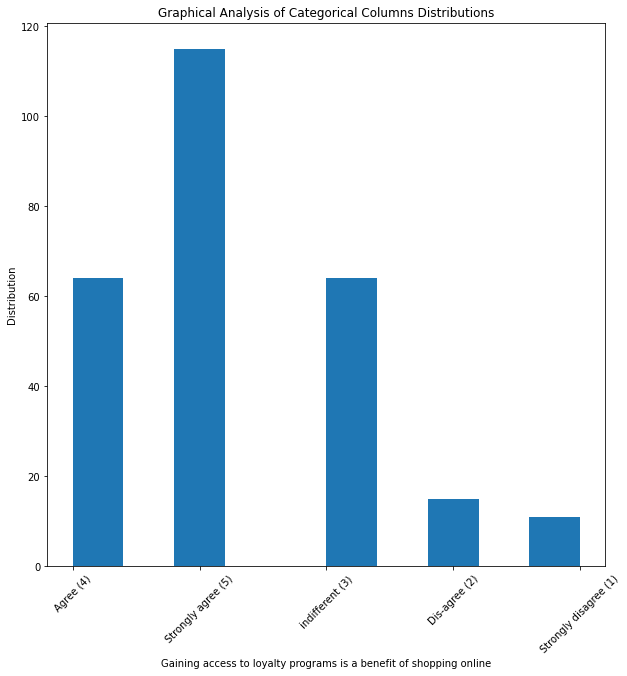

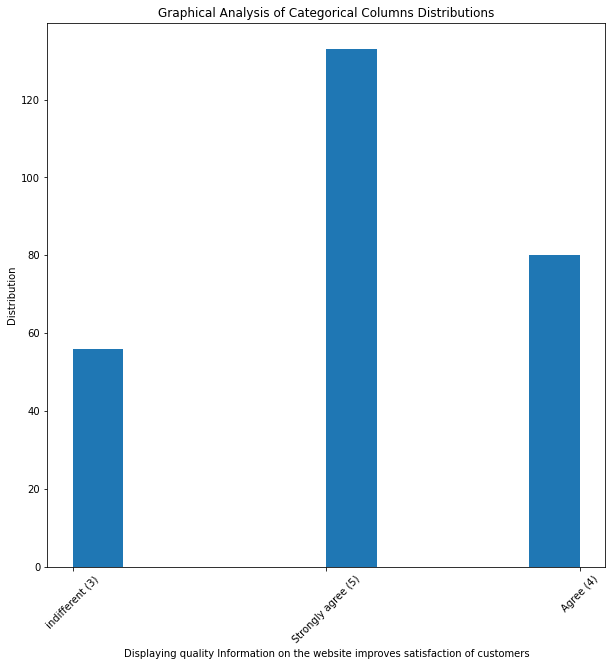

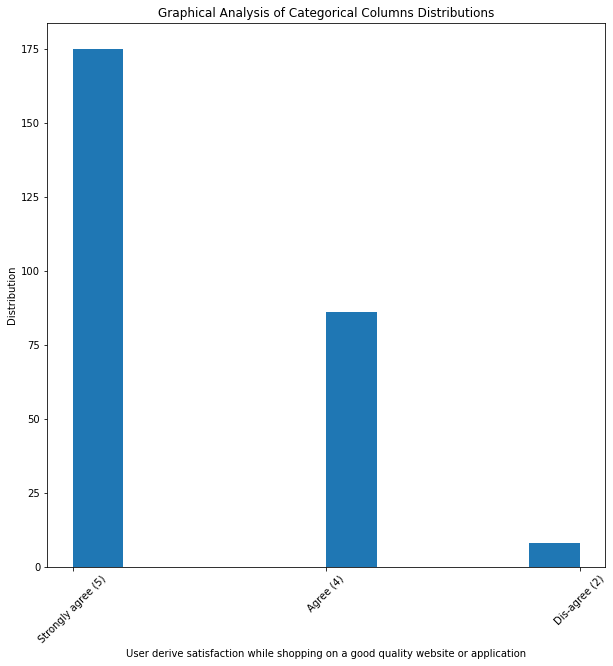

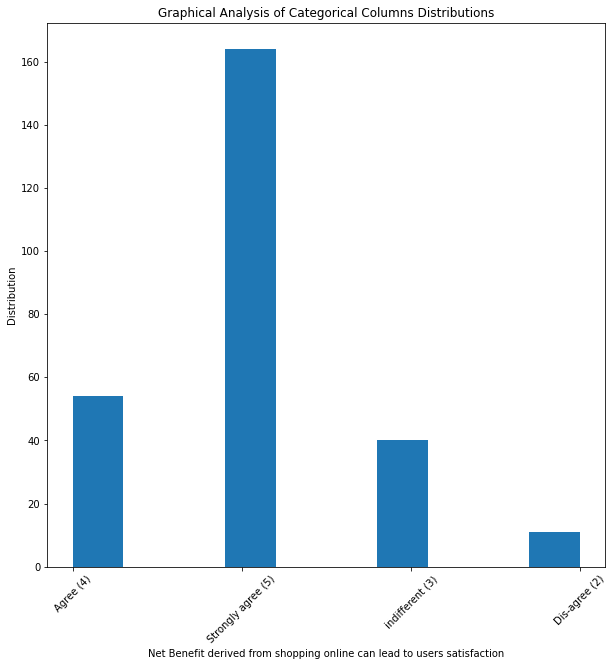

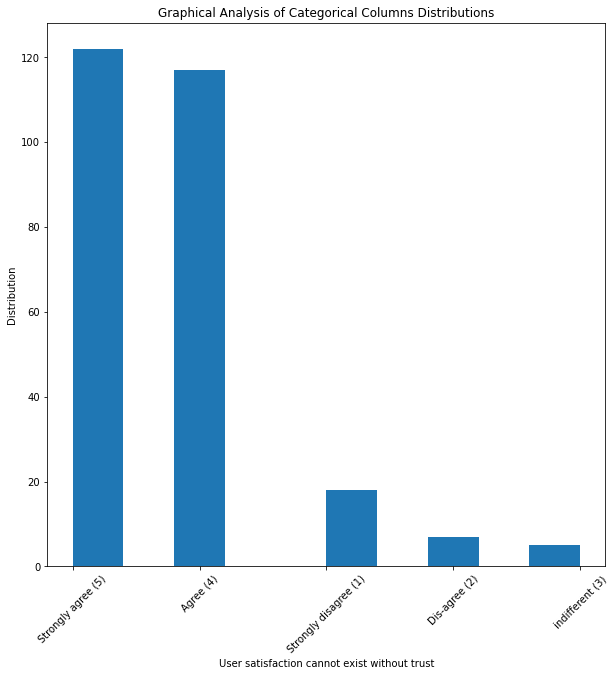

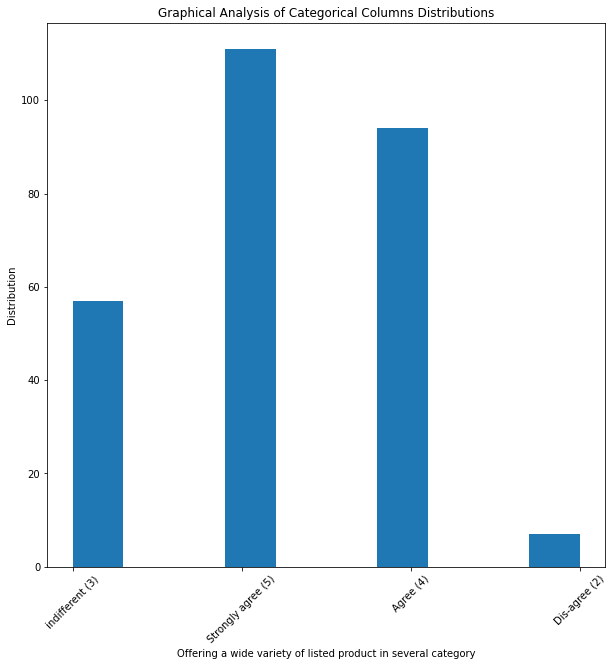

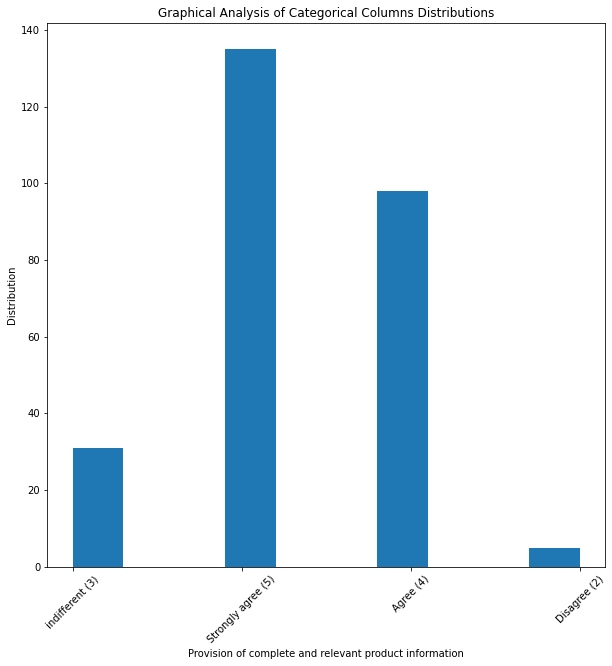

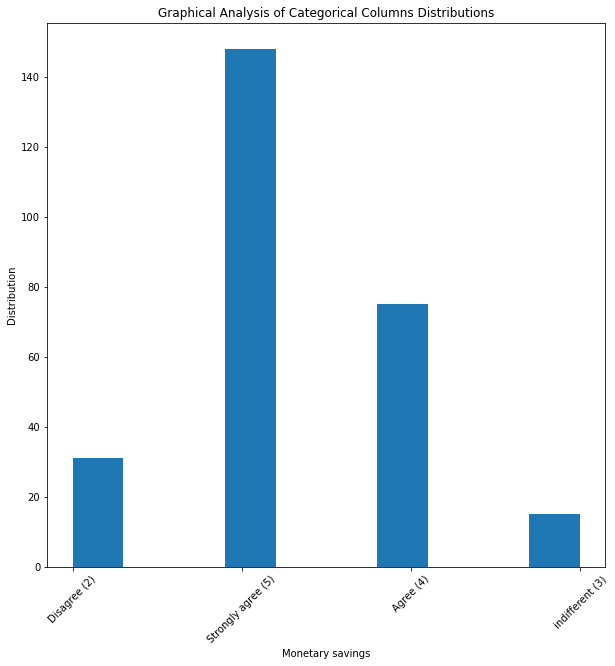

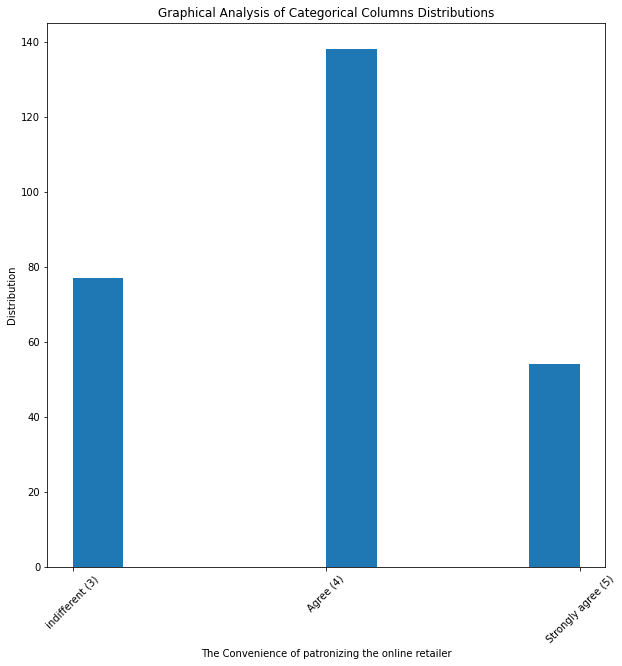

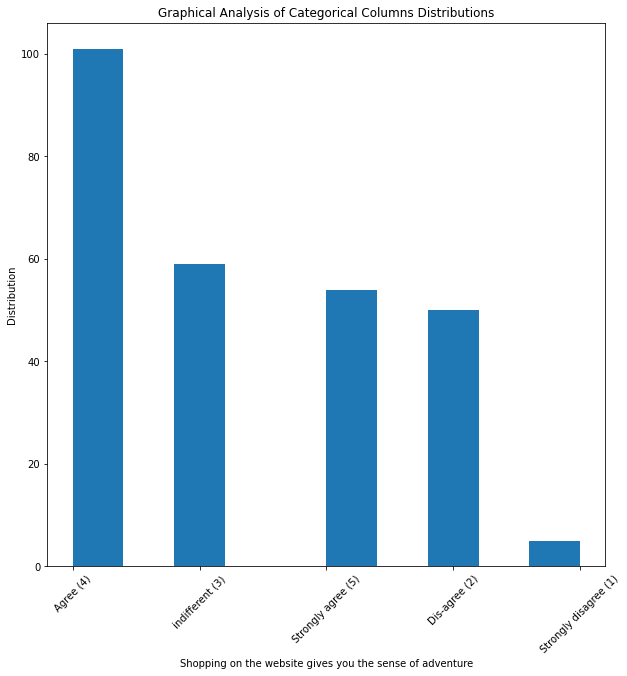

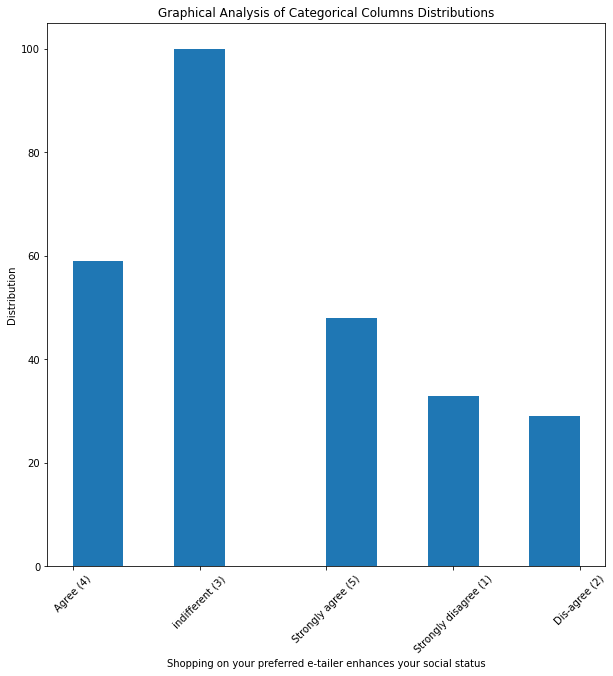

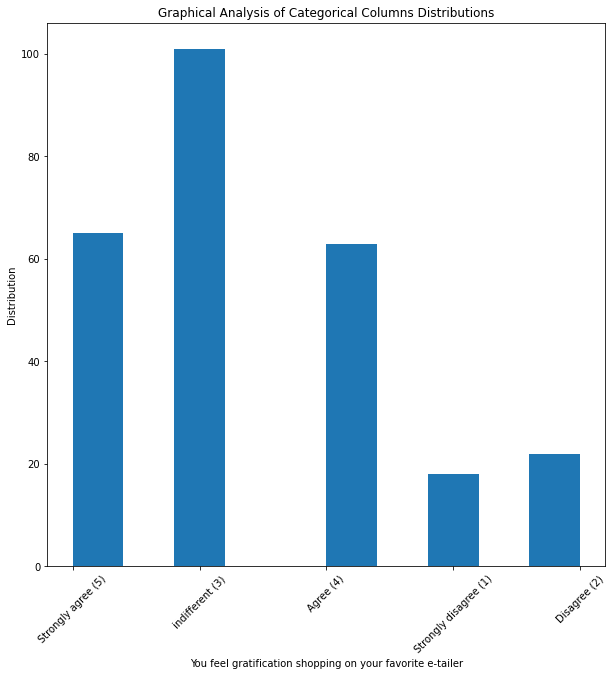

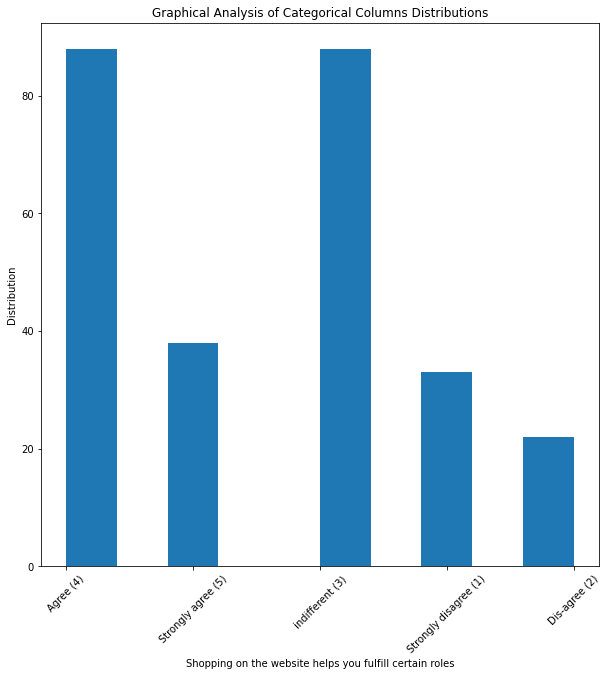

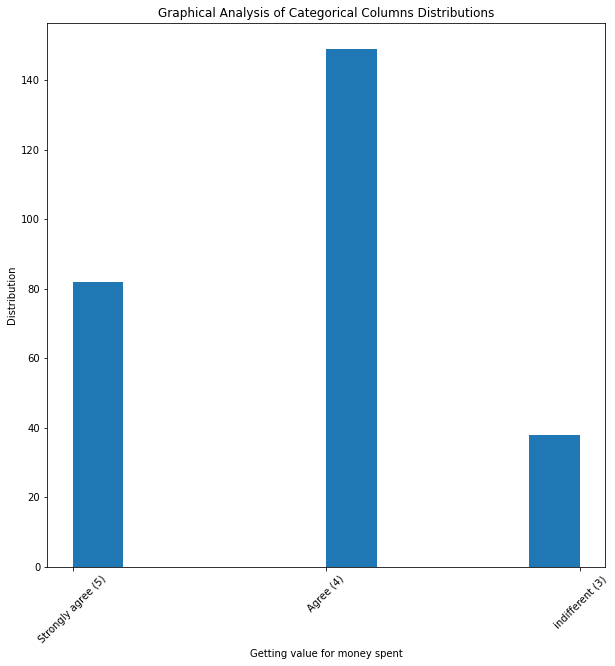

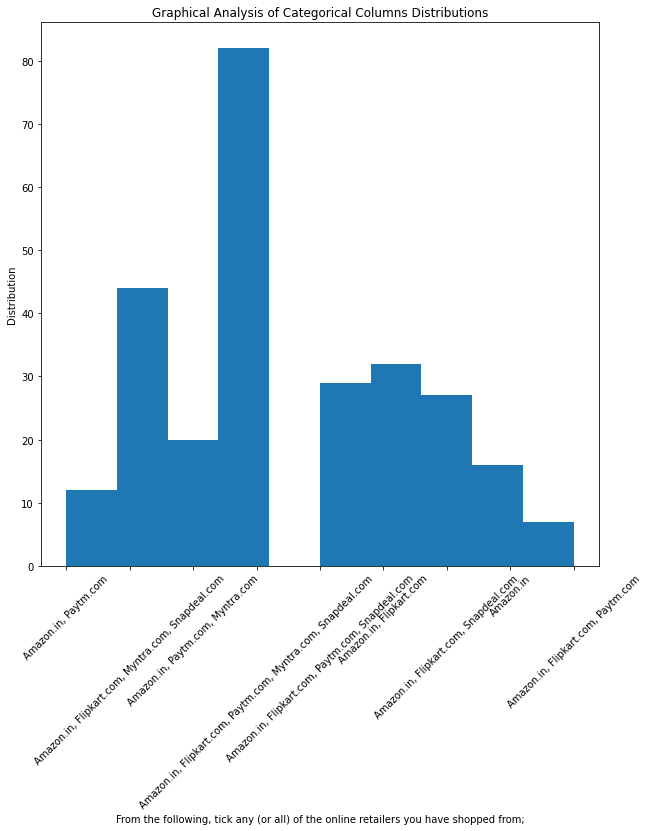

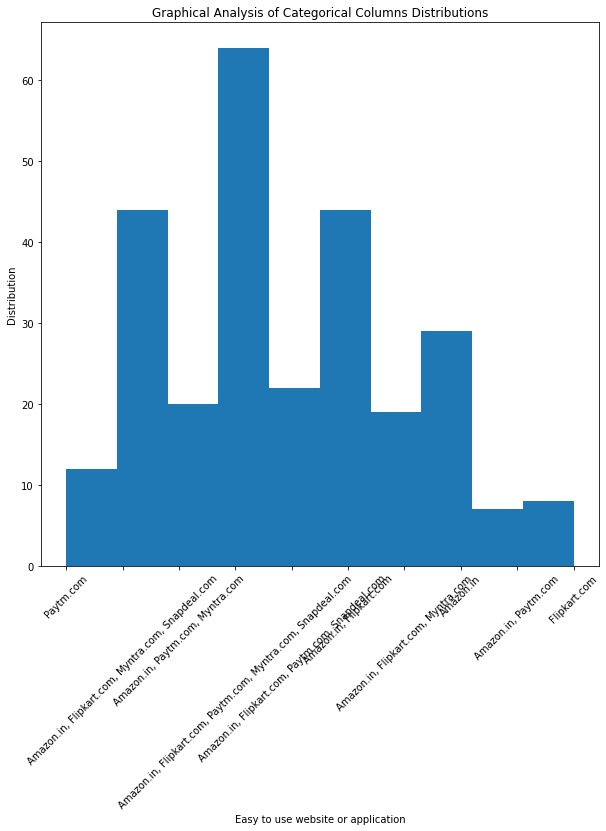

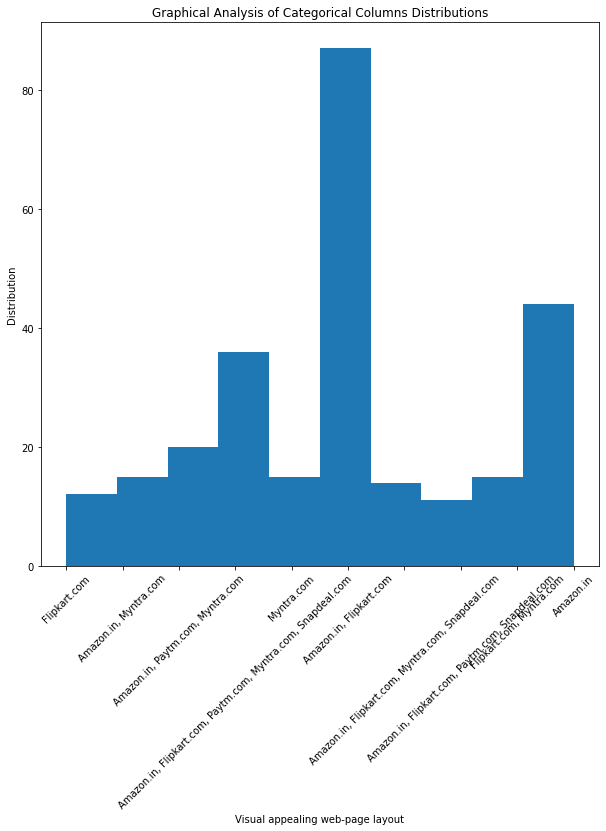

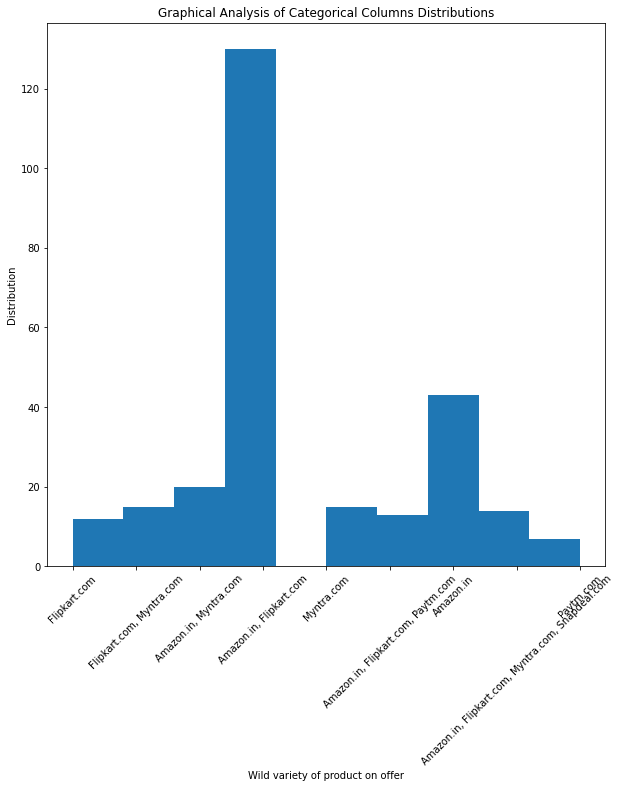

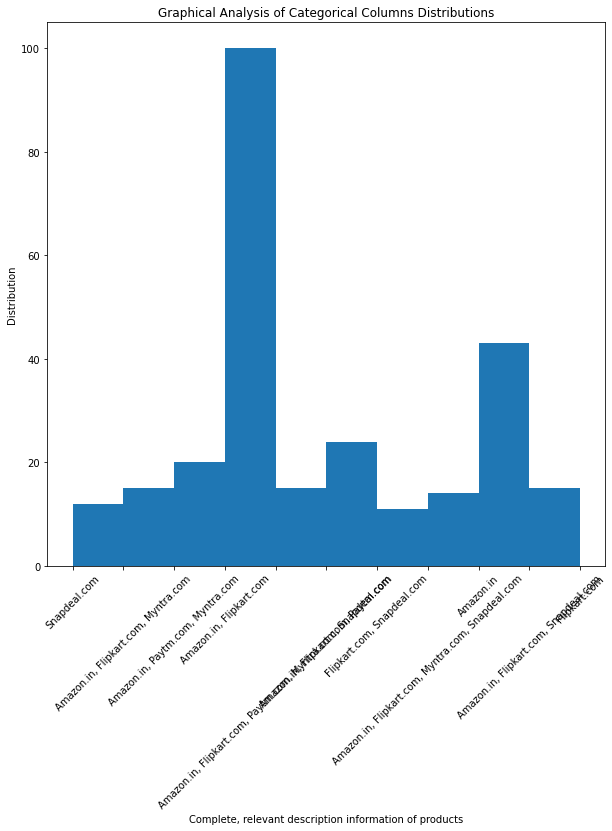

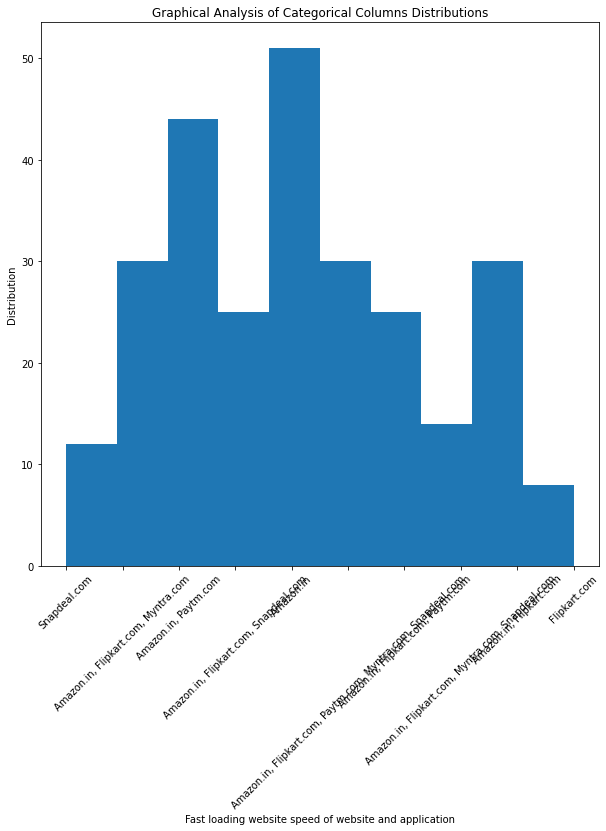

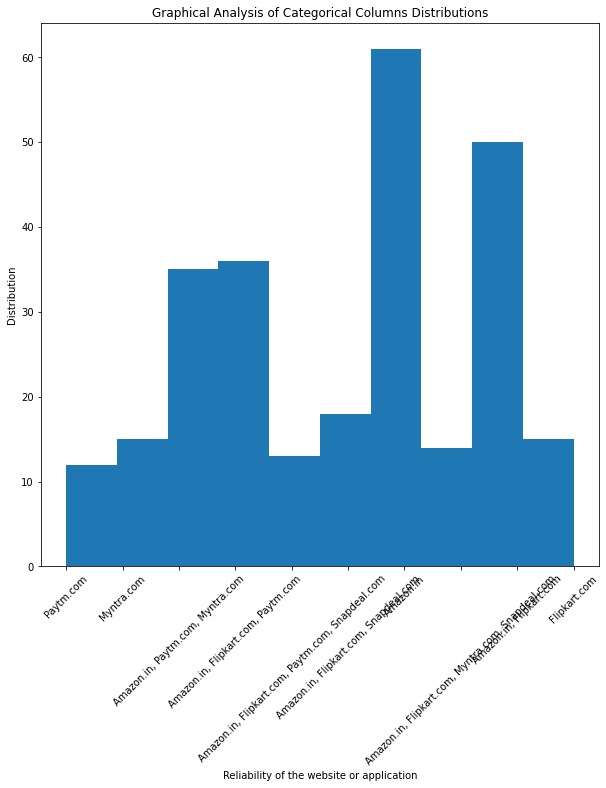

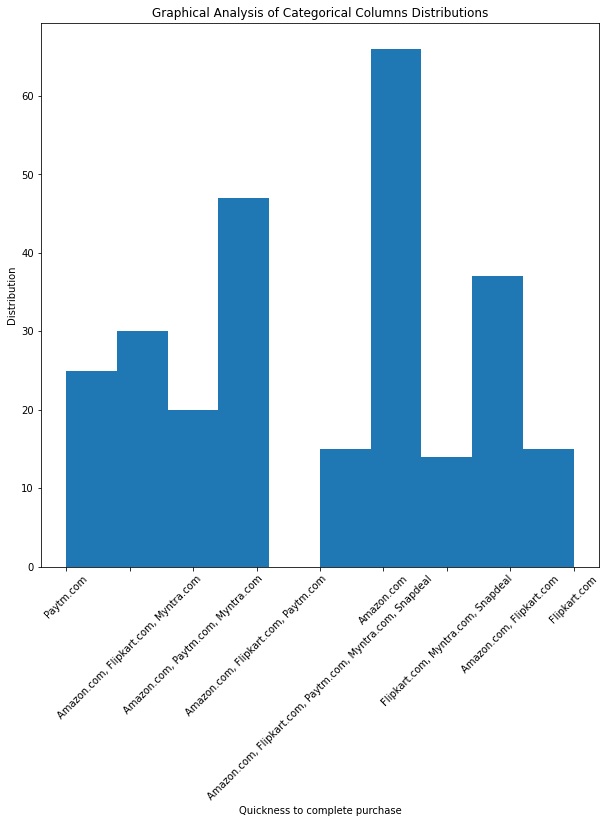

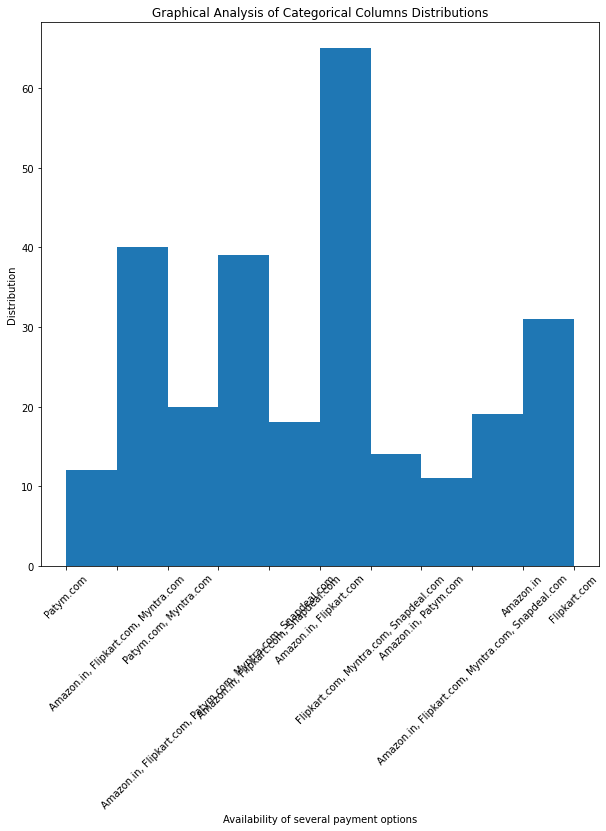

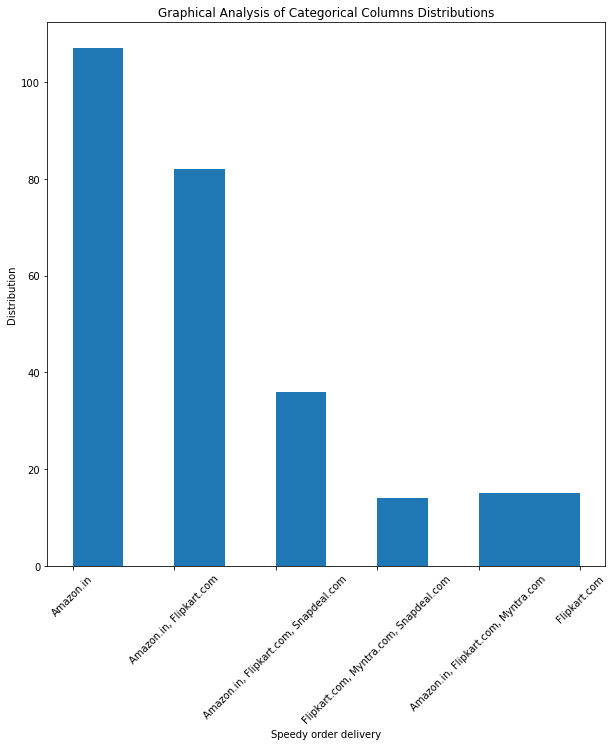

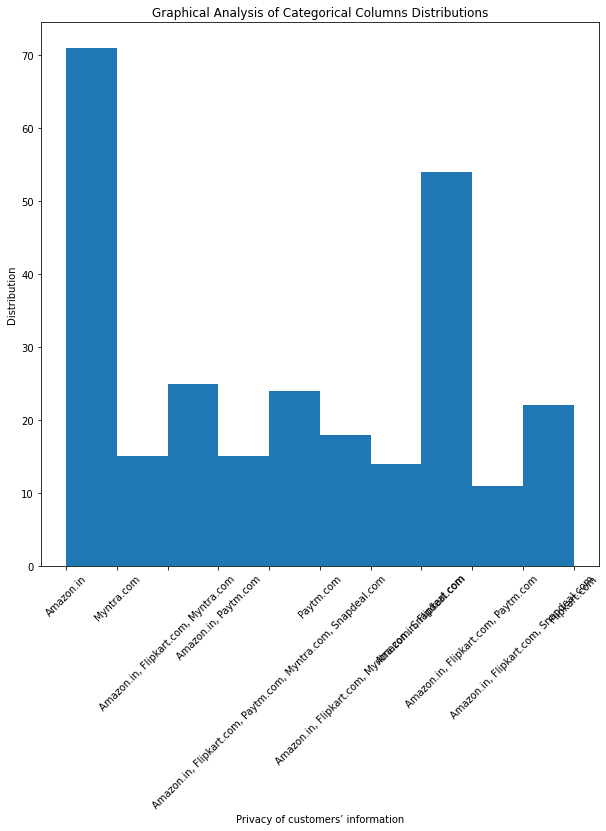

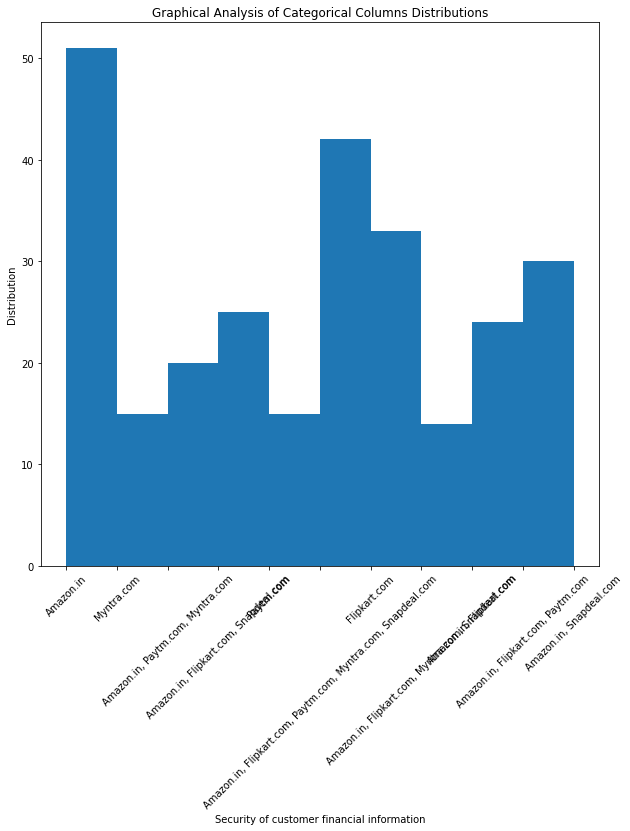

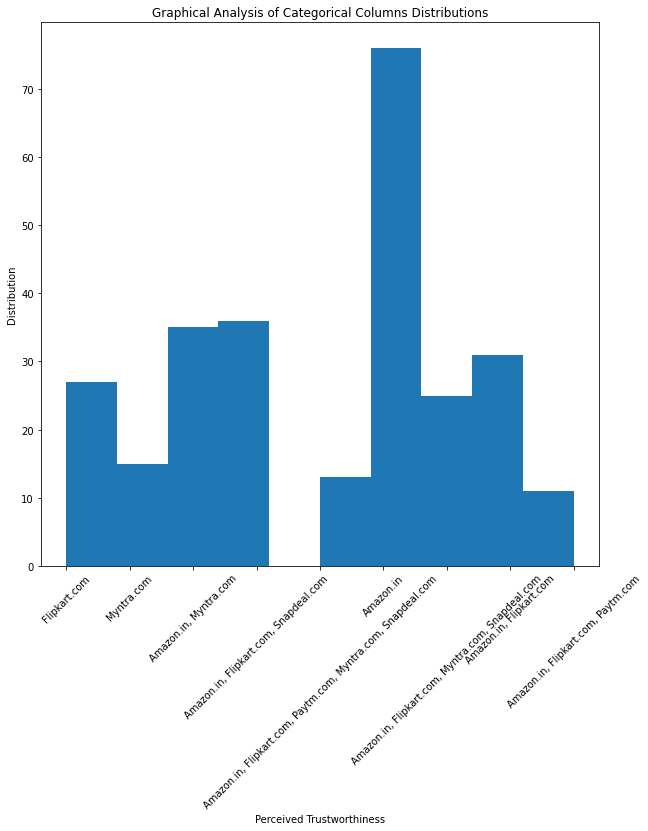

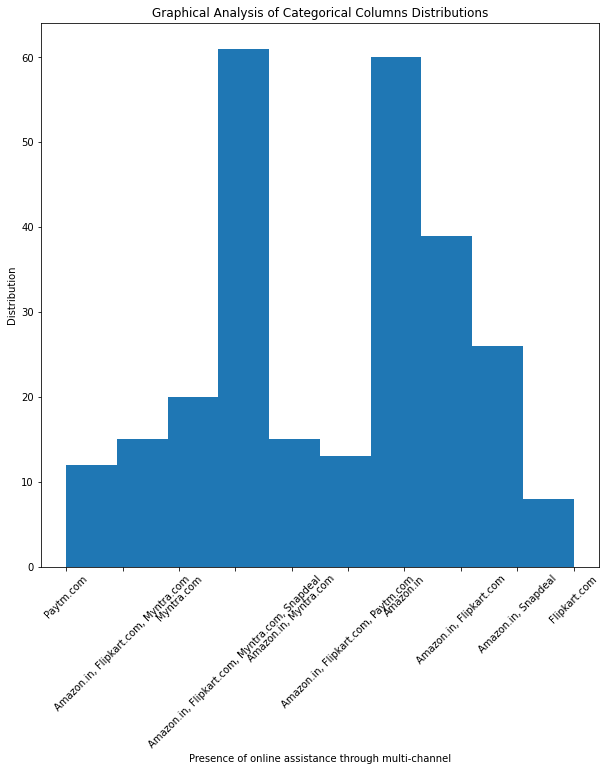

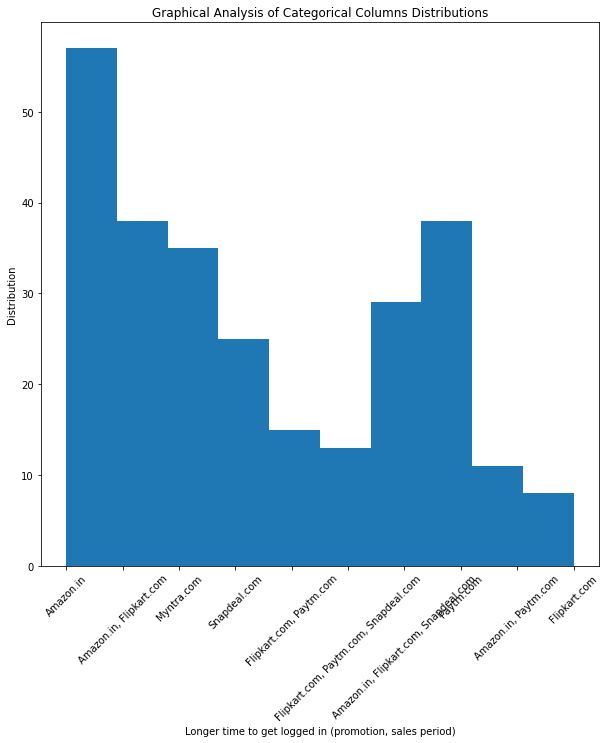

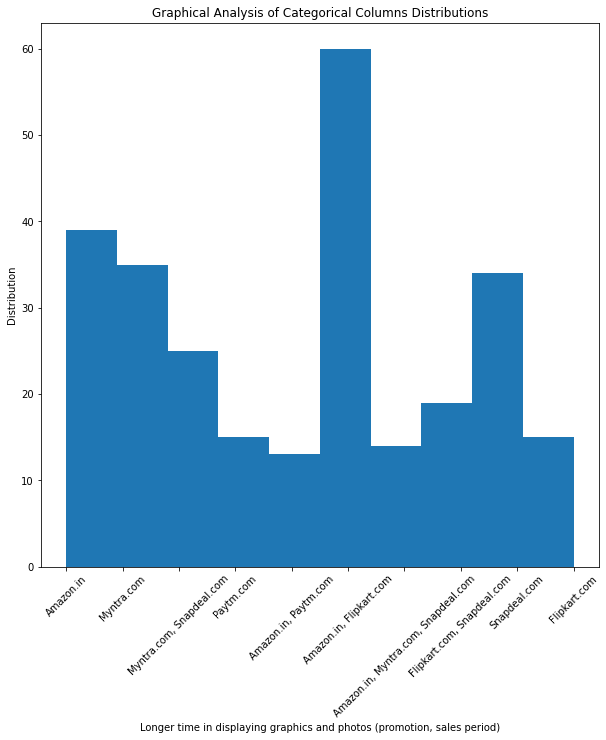

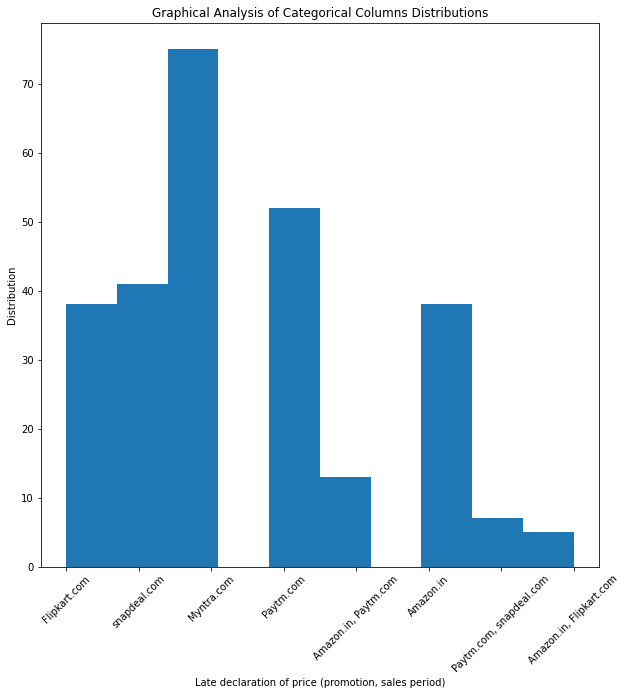

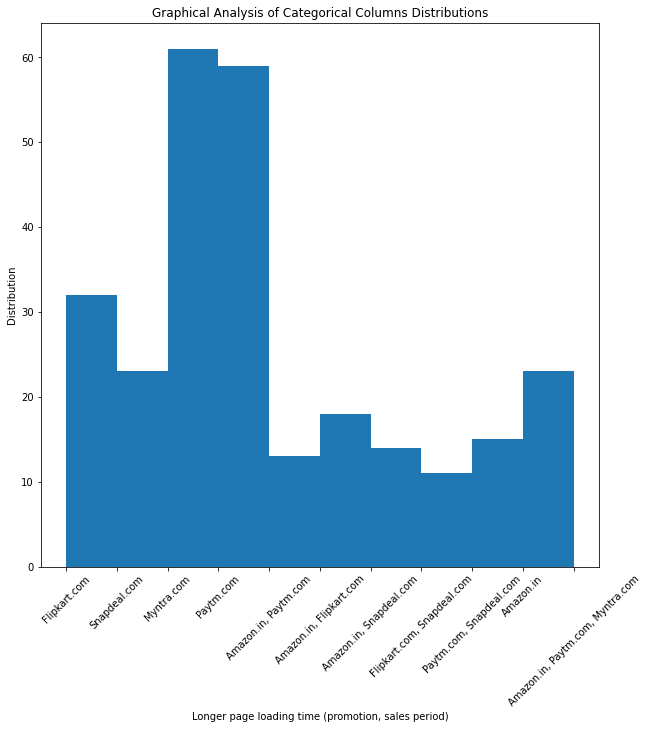

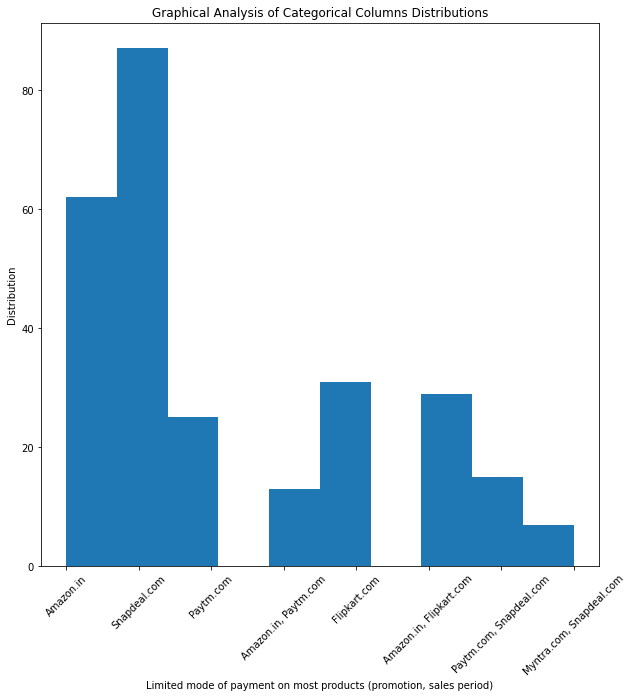

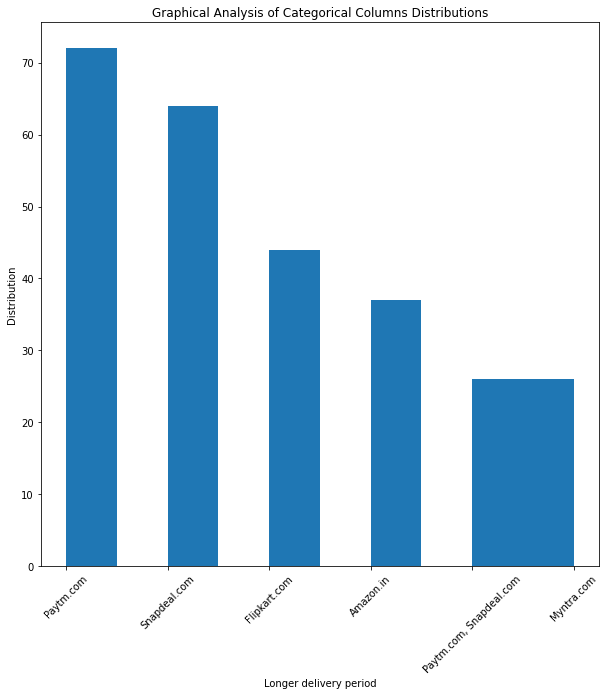

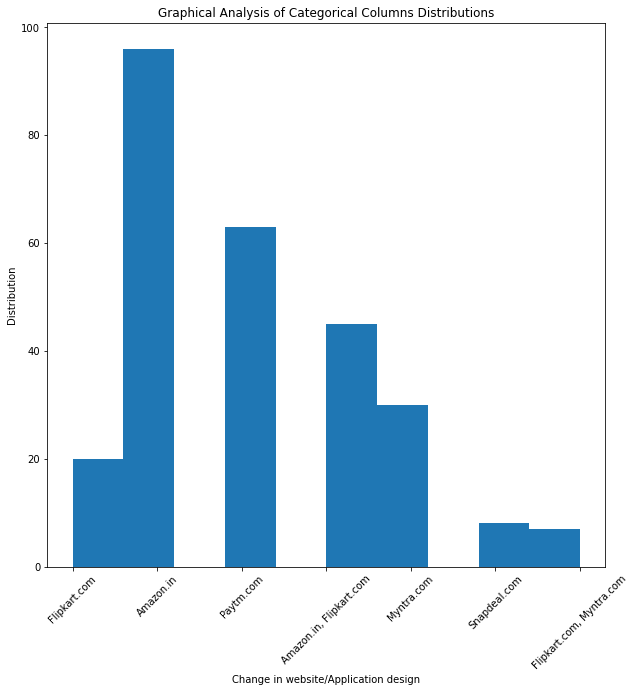

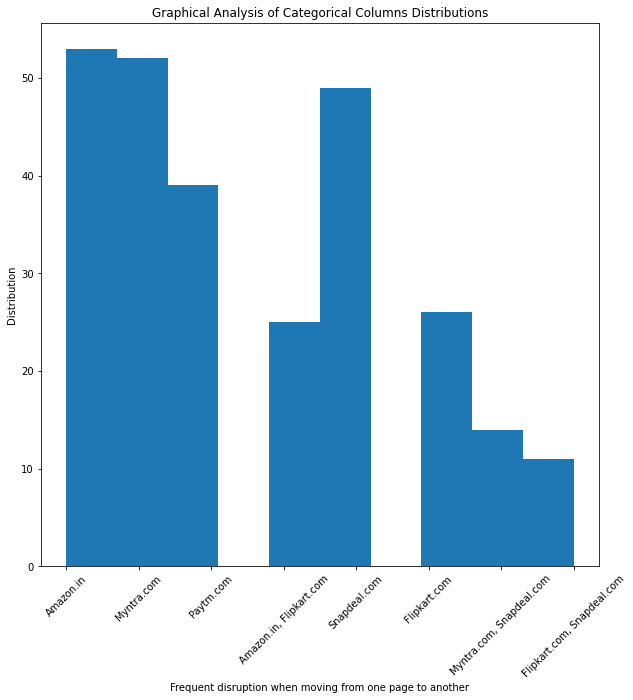

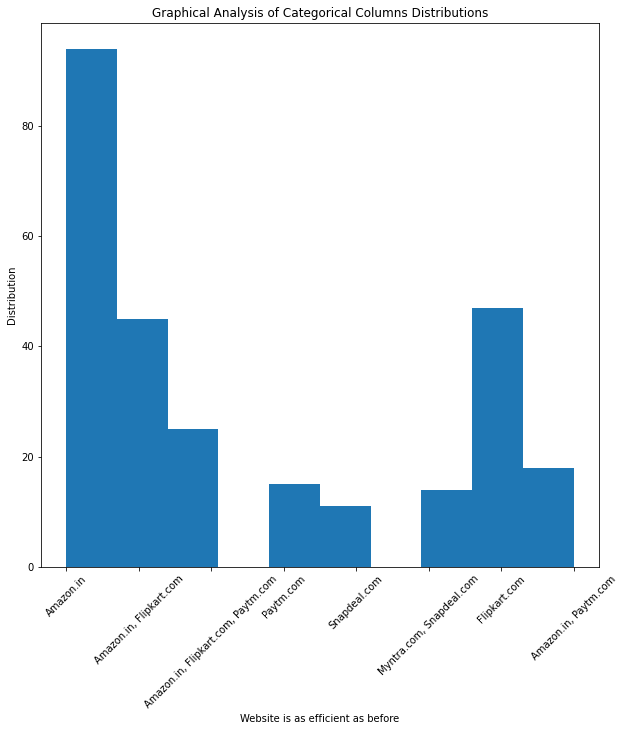

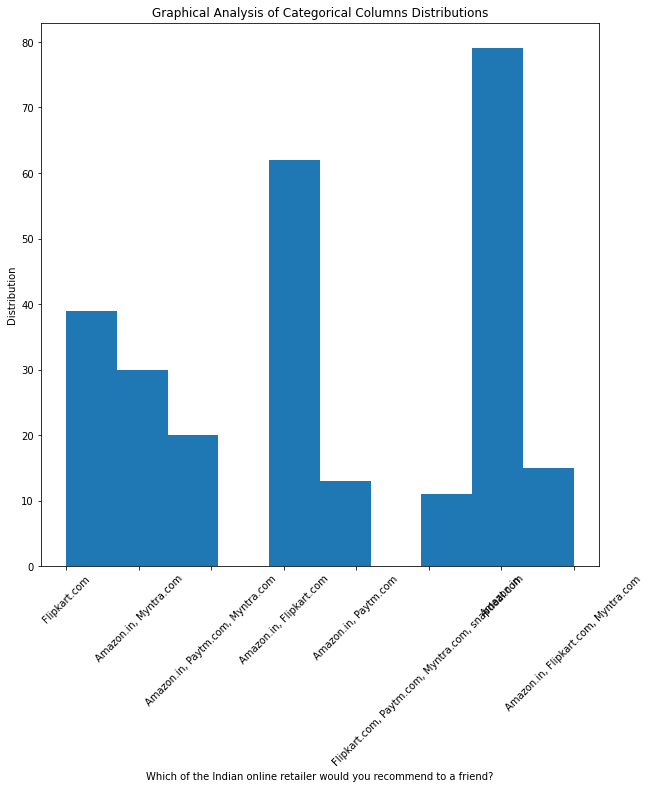

In [15]:
for i in c2:
    plt.figure(figsize=(10,10))
    plt.hist(df_cat[i])
    plt.xlabel(i)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel("Distribution")
    plt.title("Graphical Analysis of Categorical Columns Distributions")
    plt.show()

In [16]:
df.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

# Personal Information

In [17]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']

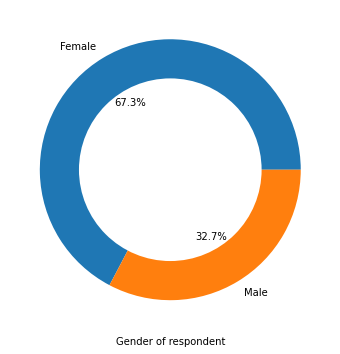

<Figure size 432x288 with 0 Axes>

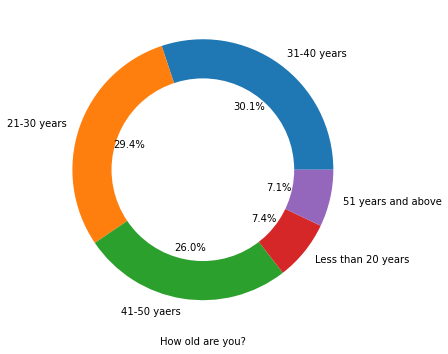

<Figure size 432x288 with 0 Axes>

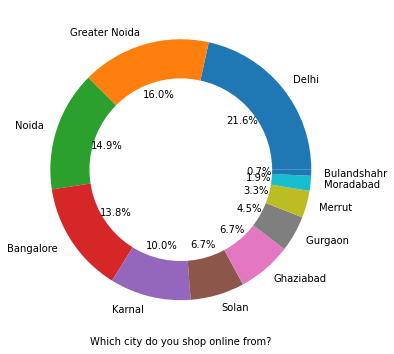

<Figure size 432x288 with 0 Axes>

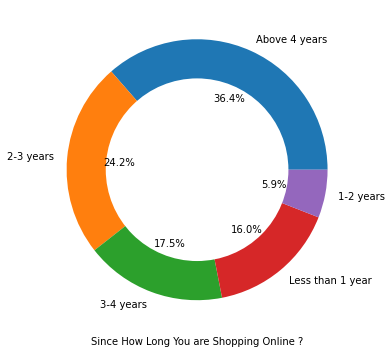

<Figure size 432x288 with 0 Axes>

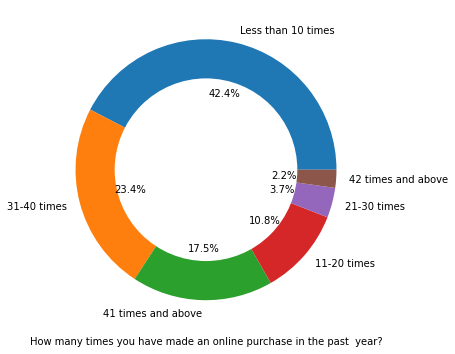

<Figure size 432x288 with 0 Axes>

In [18]:
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

# After analysing the personal information, we can conclude that there were double the number of women than men who have taken this survey.
# Most of the people are in the age group- 20-50 years followed by teenagers and senior citizens being minority.
# Most of the people belong from Delhi, Noida and Bangalore.
# There are two categories in cities section- Noida and Greater Noida which has to be processed.
# Most of the people have been shopping for a long time.
# Majority of the people purchase online for around 10 times a year.


# Analysis based on the following factors:

# 1.Intention of Repeat Purchase

Text(0, 0.5, 'From the following, tick any (or all) of the online retailers you have shopped from;')

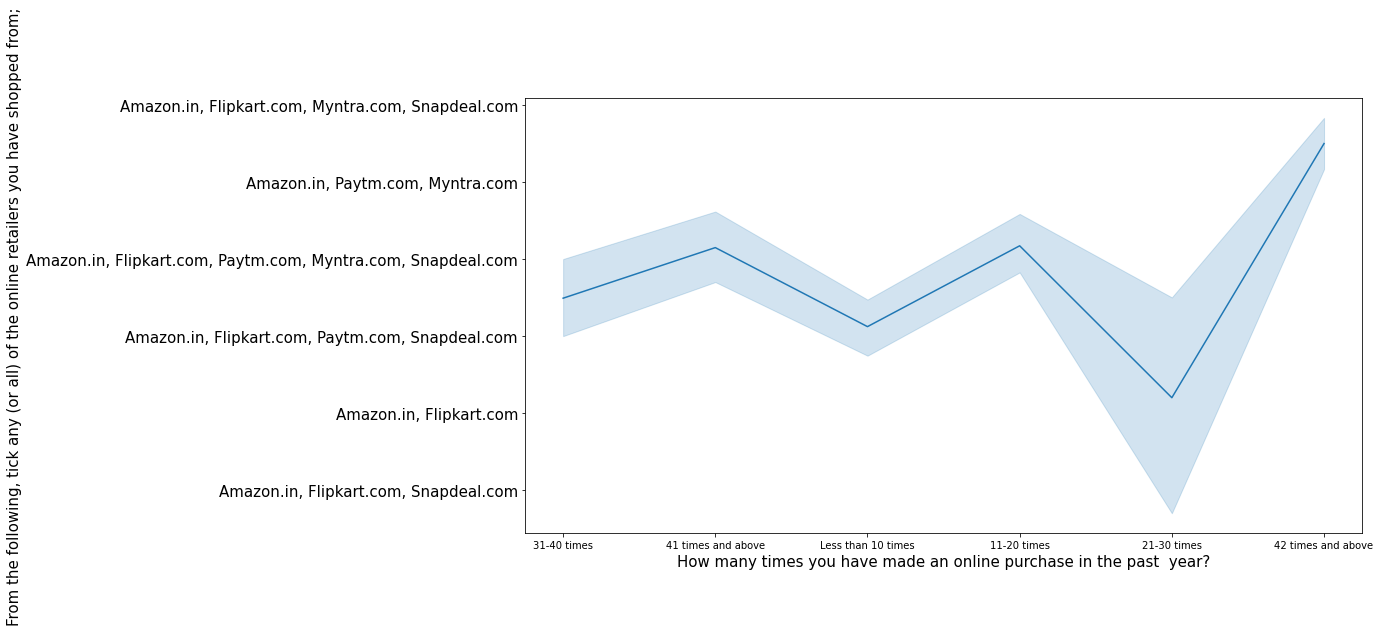

In [126]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])
plt.yticks(fontsize=15)
plt.xlabel('How many times you have made an online purchase in the past  year?',fontsize=15)
plt.ylabel('From the following, tick any (or all) of the online retailers you have shopped from;',fontsize=15)

#Shopaholics who shop more than 41 times a year shop from multiple brands, people who shop for 32-40 and less than 10 times a year
#do not shop from myntra. No matter what the scenario is , people often shop from Amazon and Flipkart

In [138]:
df['How many times you have made an online purchase in the past  year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: How many times you have made an online purchase in the past  year?, dtype: int64

In [139]:
#Converting years to numbers for better analysis

dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25,'42 times and above':46}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)

Text(0, 0.5, 'How many times you have made an online purchase in the past  year?')

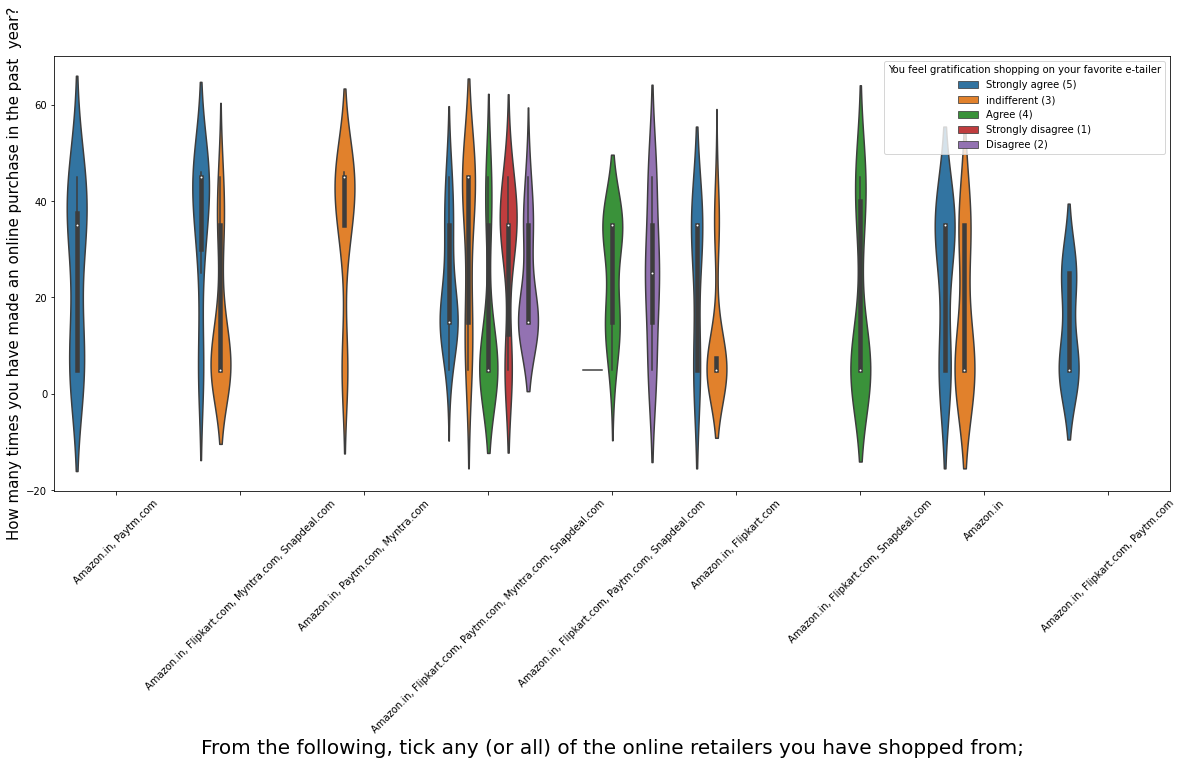

In [141]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)
plt.xlabel("From the following, tick any (or all) of the online retailers you have shopped from;",fontsize=20)
plt.ylabel("How many times you have made an online purchase in the past  year?",fontsize=15)

#Customers who shop from Amazon,Flipkart and Paytm are satisfied
#Customer who shop from multiple sites don't seem to be saisified.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

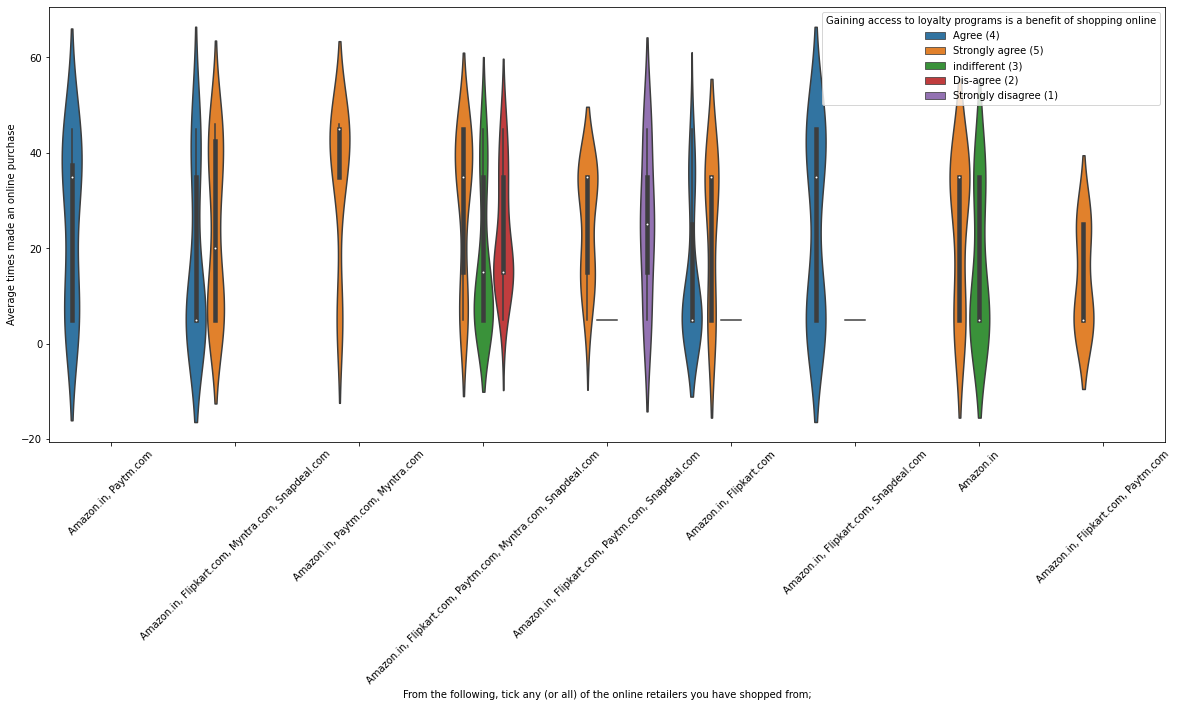

In [143]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

#Customer shopping from Amazon,Flipkart and Paytm are getting access to more loyalty programs
#But customers who shop from various online sites do not receive the same

# 2. Online Retailing 

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

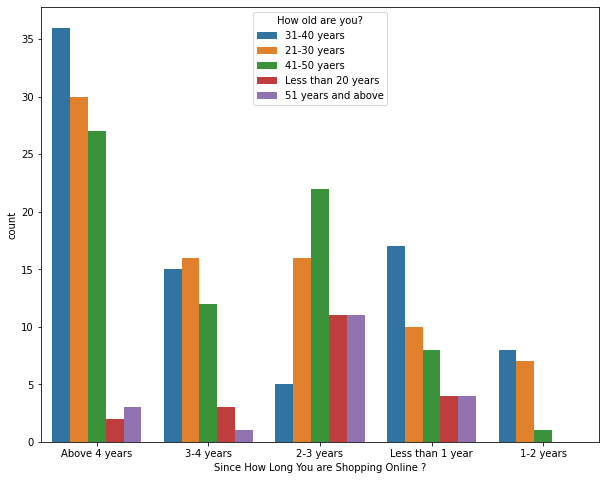

In [144]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

#Large number of people have been shopping beyond 4 years except for the age group below 20 years and above 51 years
#Customers who have been shopping from 1-2 years do not include teenagers and old people

In [146]:
#Converting years to number for easier analysis

dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

In [151]:
#Changing Greater noida to noida
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Average years of shopping online'>

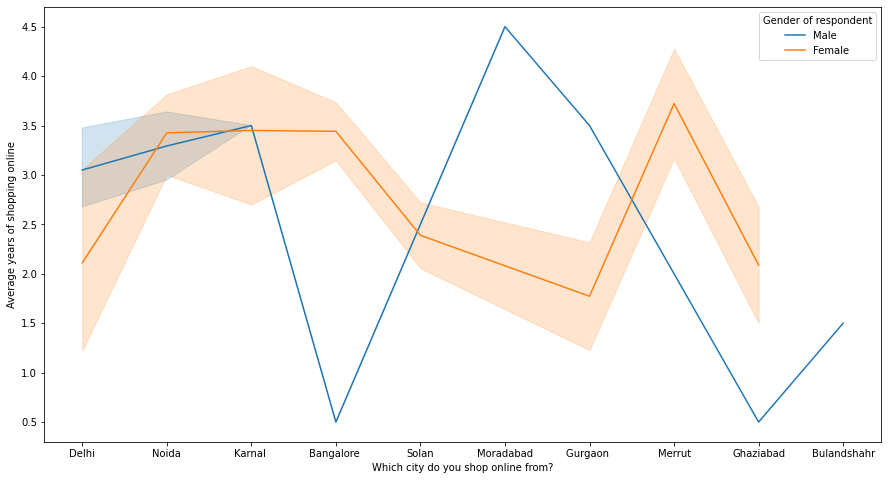

In [152]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Which city do you shop online from?'],df['Average years of shopping online'],hue=df['Gender of respondent'])

#From the below plot, we can conclude that the density of women customers are higher than men.
#Customers who are men from Bangalore and Ghaziabad have shopped for less than a year.
#Highest number of men shopping online belong from Delhi and Noida
#Men from Moradabad have been shopping online for the longest.
#Women from meerut and noida have shopped the longest

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

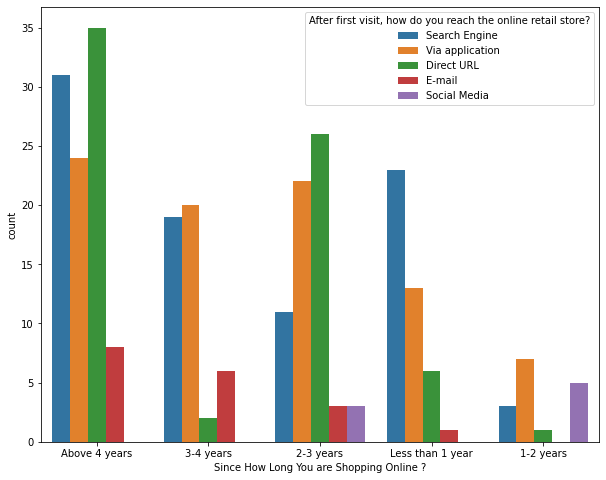

In [153]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])
#Many customers who have been shopping online for more than 4 years still use the website, which denotes that online brands
#should focus on keeping the website updated

# 3. Brand Image

In [154]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

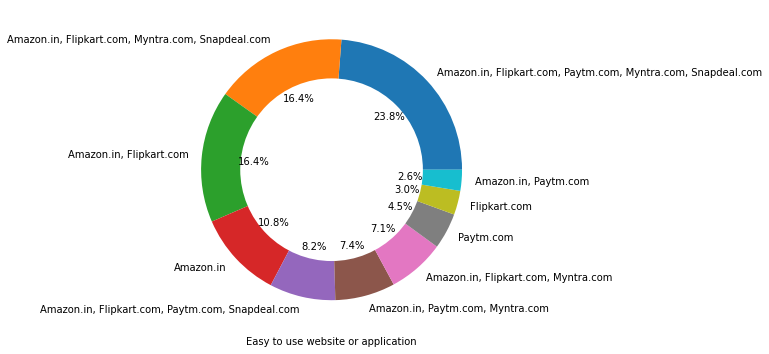

<Figure size 432x288 with 0 Axes>

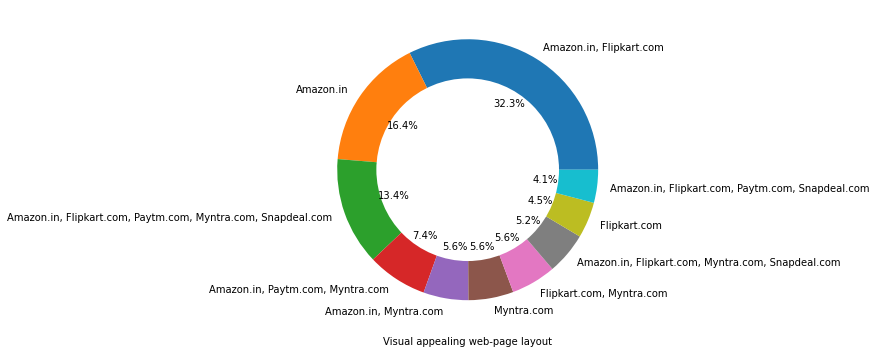

<Figure size 432x288 with 0 Axes>

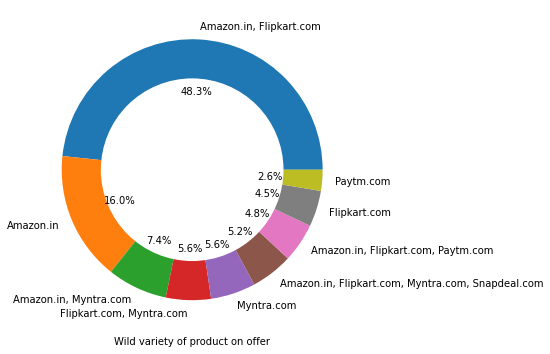

<Figure size 432x288 with 0 Axes>

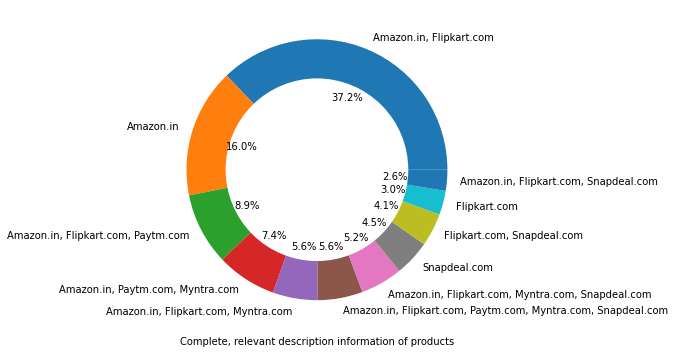

<Figure size 432x288 with 0 Axes>

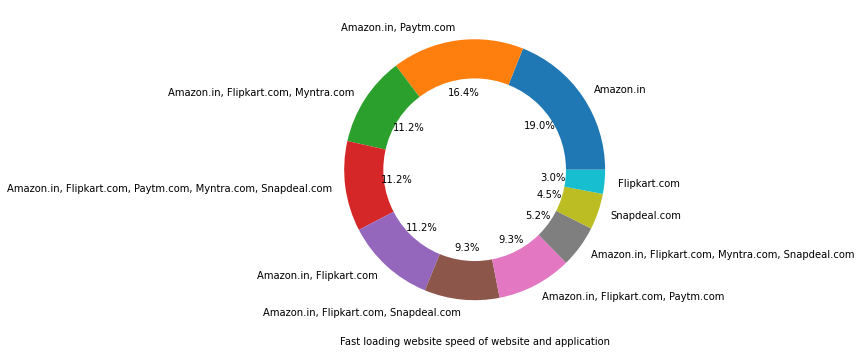

<Figure size 432x288 with 0 Axes>

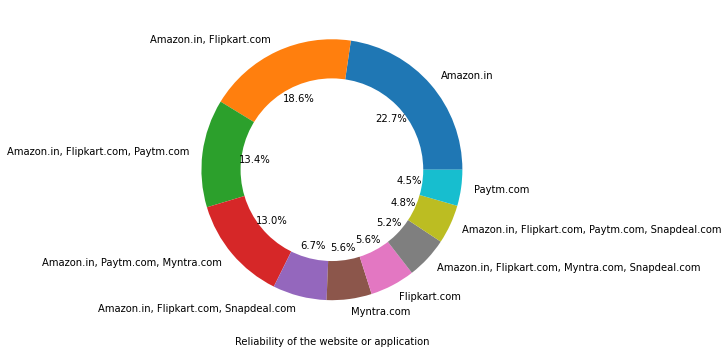

<Figure size 432x288 with 0 Axes>

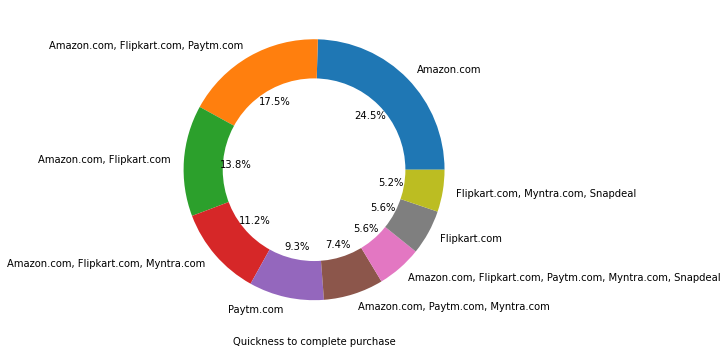

<Figure size 432x288 with 0 Axes>

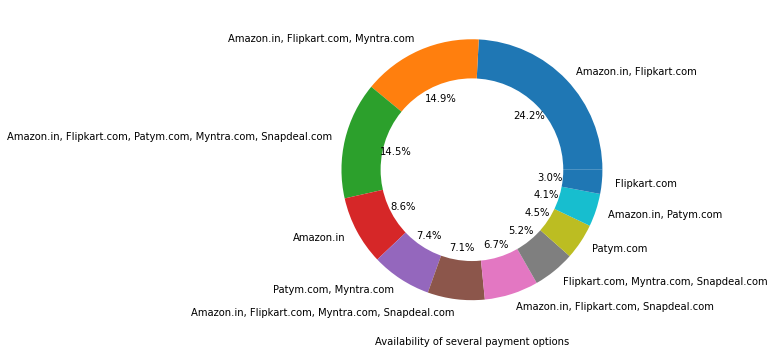

<Figure size 432x288 with 0 Axes>

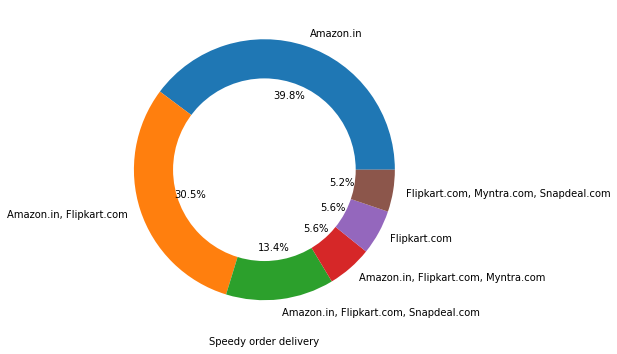

<Figure size 432x288 with 0 Axes>

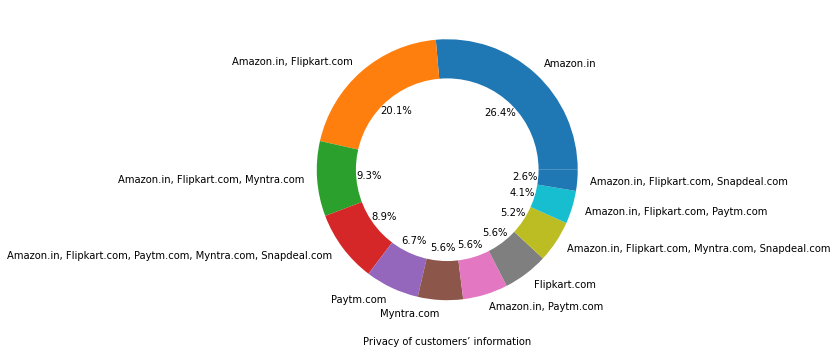

<Figure size 432x288 with 0 Axes>

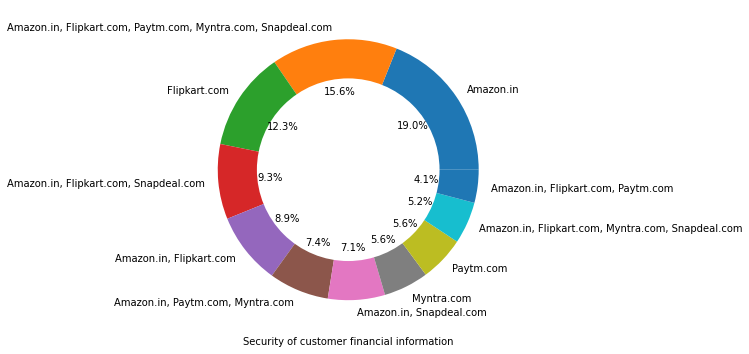

<Figure size 432x288 with 0 Axes>

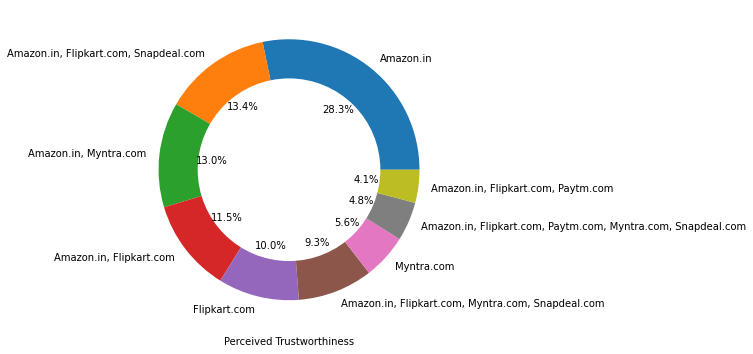

<Figure size 432x288 with 0 Axes>

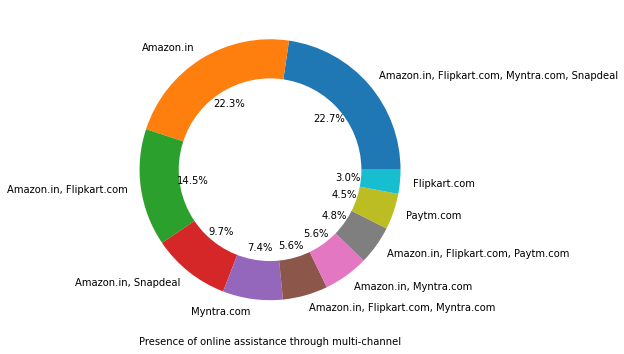

<Figure size 432x288 with 0 Axes>

In [155]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()
        
#From the below pie plots, Amazon and Flipkart have the highest percentage with respect to brand image followed by Paytm and Myntra

Text(0.5, 0, 'Why did you abandon the “Bag”, “Shopping Cart”?')

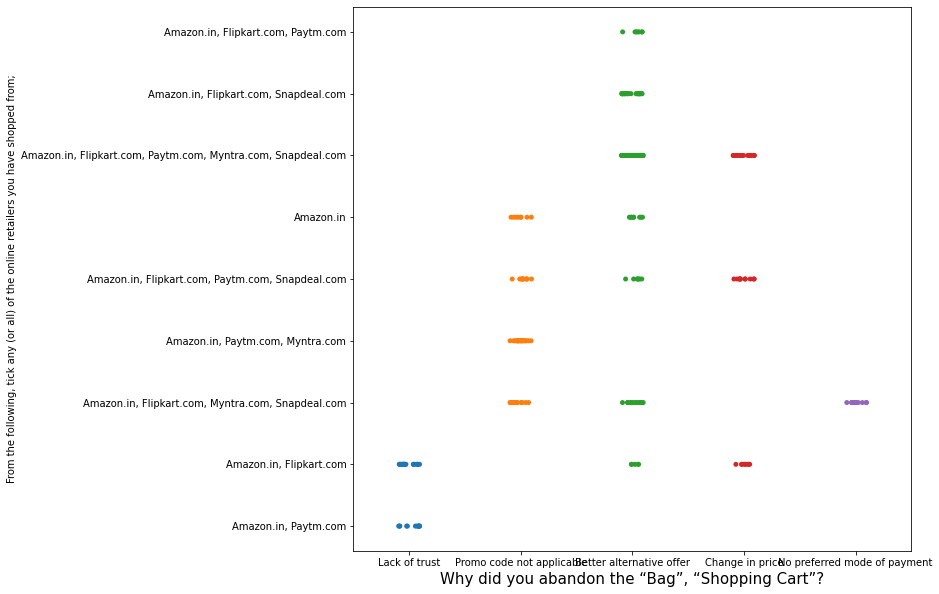

In [22]:
plt.figure(figsize=(10,10))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])
plt.xlabel("Why did you abandon the “Bag”, “Shopping Cart”?",fontsize=15)

#We can see from the below plot that there are many people who leave their cart because they find a better alternative offer
#which is occuring often in Amazon,Flipkart and Paytm.

# 4. Loyalty

In [23]:
#Extracting all negative columns about a brand
neg=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

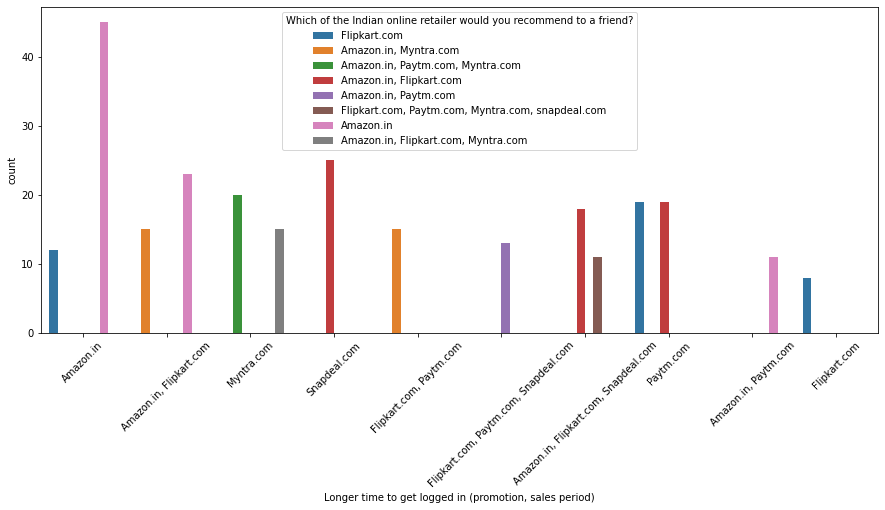

<Figure size 432x288 with 0 Axes>

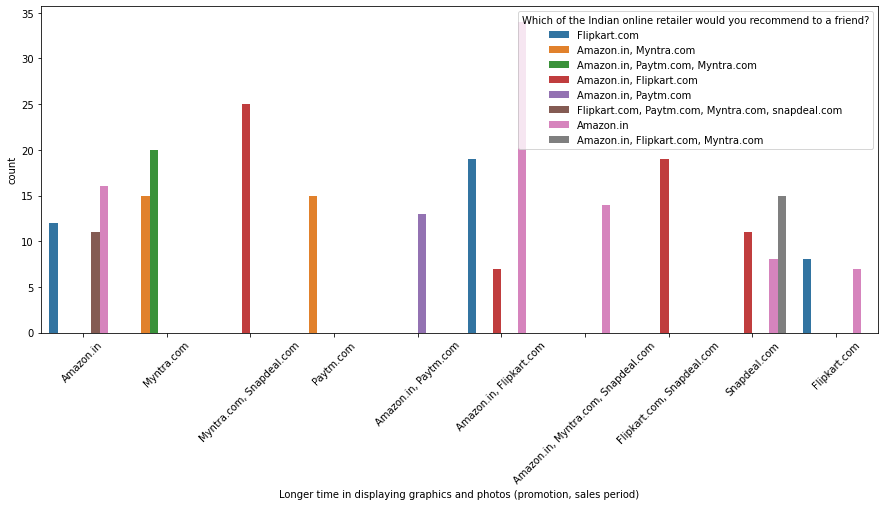

<Figure size 432x288 with 0 Axes>

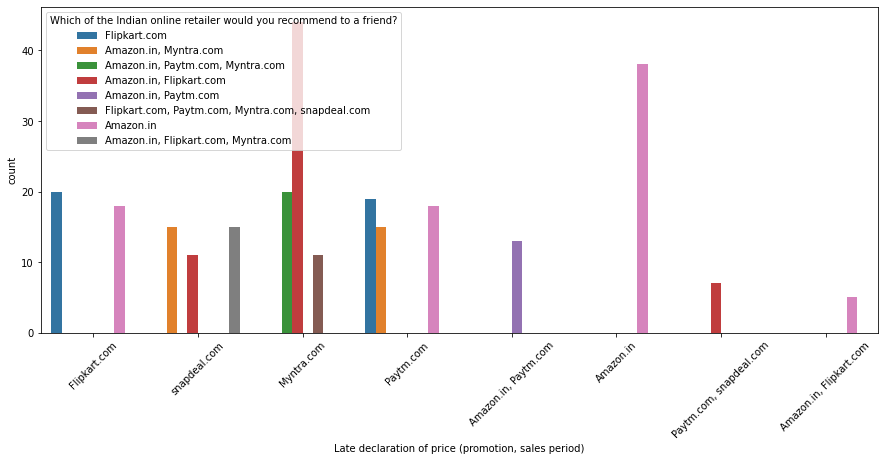

<Figure size 432x288 with 0 Axes>

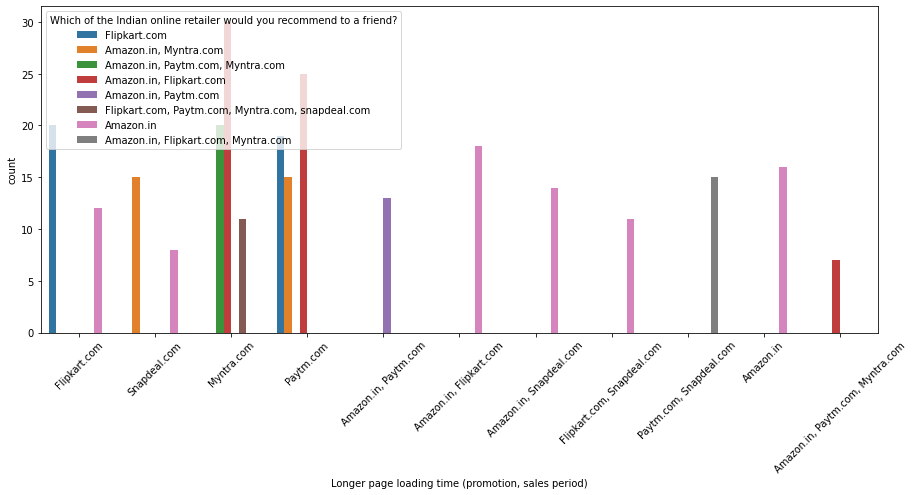

<Figure size 432x288 with 0 Axes>

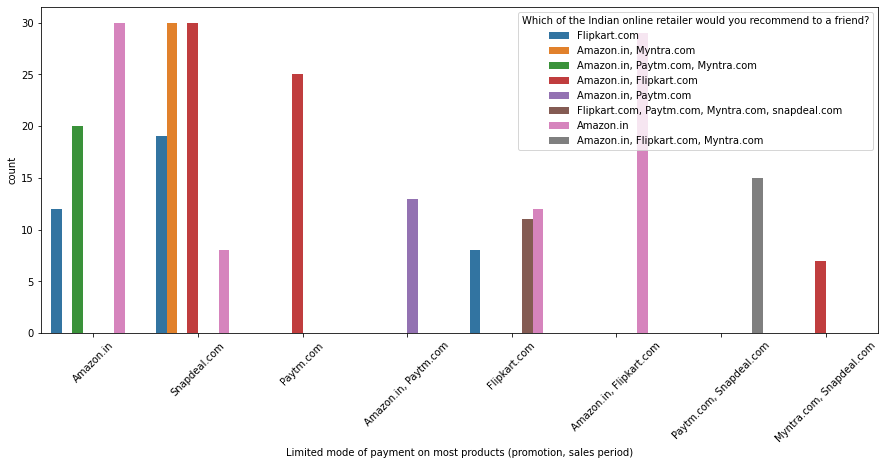

<Figure size 432x288 with 0 Axes>

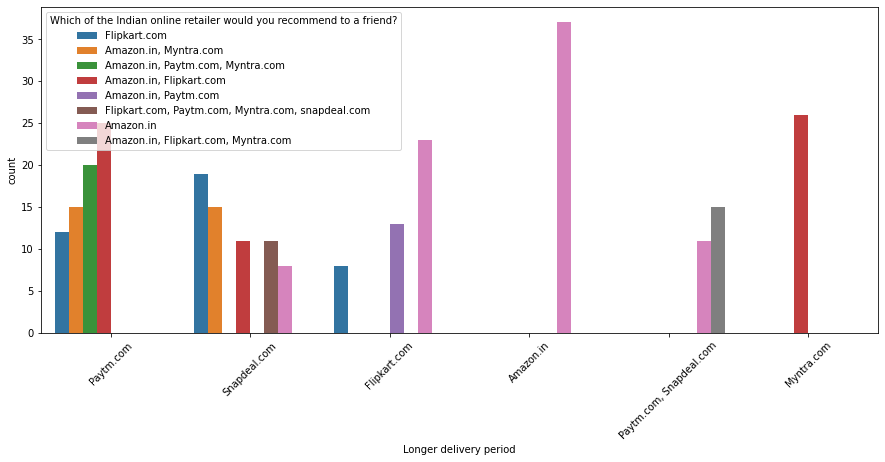

<Figure size 432x288 with 0 Axes>

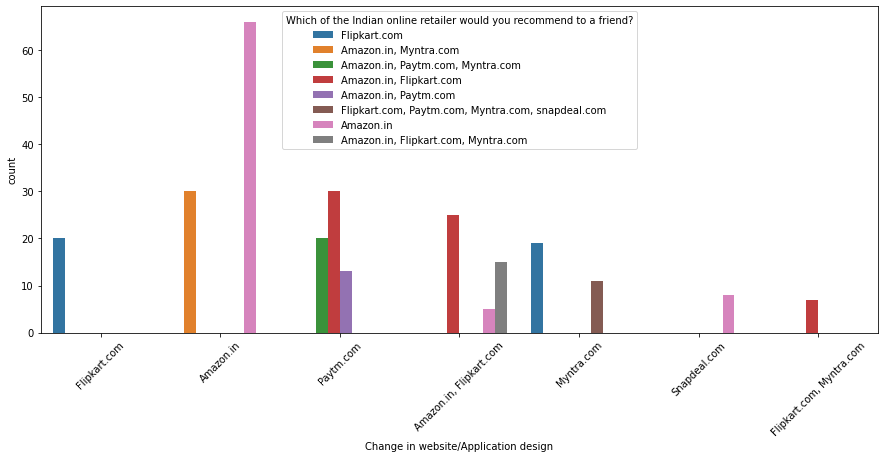

<Figure size 432x288 with 0 Axes>

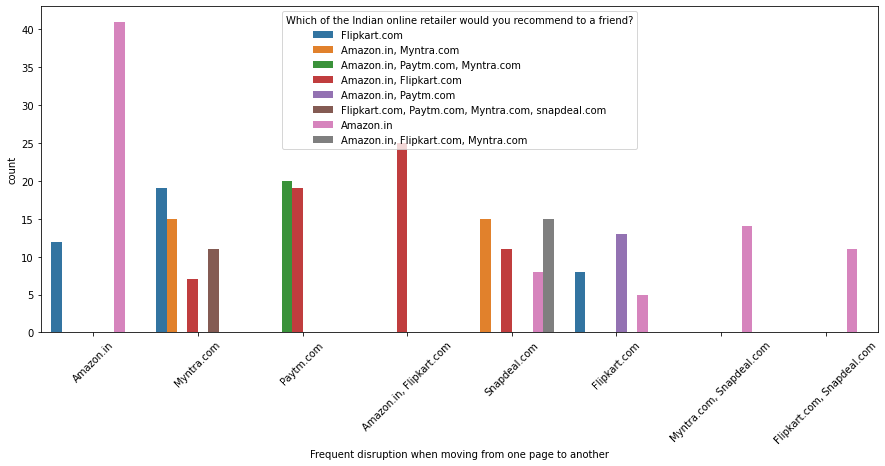

<Figure size 432x288 with 0 Axes>

In [31]:
for i in neg:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

In [7]:
df_new=df.copy()

In [52]:
df_new

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
5                 Female         31-40 years   
6                   Male         41-50 yaers   
7                   Male         41-50 yaers   
8                 Female  Less than 20 years   
9                 Female         31-40 years   
10                  Male         31-40 years   
11                Female         41-50 yaers   
12                Female  51 years and above   
13                Female         31-40 years   
14                Female         21-30 years   
15                Female         21-30 years   
16                  Male         31-40 years   
17                  Male         41-50 yaers   
18                Female         41-50 yaers   
19                Female         21-30 years   
20                Female         21-30 years   
21                  Male         31-40 years   
22                  Male         41-50 yaers   
23                Female         41-50 yaers   
24                Female         21-30 years   
25                Female         21-30 years   
26                  Male         21-30 years   
27                  Male         31-40 years   
28                Female         41-50 yaers   
29                Female         41-50 yaers   
30                Female  Less than 20 years   
31                  Male         31-40 years   
32                  Male         31-40 years   
33                Female         41-50 yaers   
34                Female  51 years and above   
35                Female         21-30 years   
36                  Male         31-40 years   
37                  Male         41-50 yaers   
38                Female         41-50 yaers   
39                Female         21-30 years   
40                Female         21-30 years   
41                  Male         31-40 years   
42                  Male         21-30 years   
43                Female         21-30 years   
44                Female         31-40 years   
45                Female         41-50 yaers   
46                  Male         41-50 yaers   
47                  Male  Less than 20 years   
48                Female         31-40 years   
49                Female         31-40 years   
50                Female         41-50 yaers   
51                  Male  51 years and above   
52                  Male         41-50 yaers   
53                Female         41-50 yaers   
54                Female         21-30 years   
55                Female         21-30 years   
56                  Male         21-30 years   
57                  Male         21-30 years   
58                Female         31-40 years   
59                Female         41-50 yaers   
60                Female         41-50 yaers   
61                  Male  Less than 20 years   
62                  Male         31-40 years   
63                Female         31-40 years   
64                Female         41-50 yaers   
65                Female  51 years and above   
66                  Male         31-40 years   
67                  Male         41-50 yaers   
68                Female         41-50 yaers   
69                Female         21-30 years   
70                Female         21-30 years   
71                  Male         31-40 years   
72                  Male         21-30 years   
73                Female         21-30 years   
74                Female         31-40 years   
75                Female         41-50 yaers   
76                  Male         41-50 yaers   
77                  Male  Less than 20 years   
78                Female         31-40 years   
79                Female         31-40 years   
80                Female         41-50 yaers   
81                  Male  51 years and above   
82                  

In [43]:
#Splitting features and target
X=df_new.drop("Which of the Indian online retailer would you recommend to a friend?",axis=1)
Y=df_new[["Which of the Indian online retailer would you recommend to a friend?"]]

# Encoding Categorical Columns

In [44]:
cat=[i for i in X.columns if X[i].dtypes=='object']

In [45]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()


In [46]:
for i in cat:
    X[i]=encode.fit_transform(X[i].values.reshape(-1,1))


In [47]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(X)

X_s=pd.DataFrame(x,columns=X.columns)

In [48]:
X_s.columns.values

array(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_s,Y,random_state=4,test_size=0.33)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [50]:
rf=RandomForestClassifier()


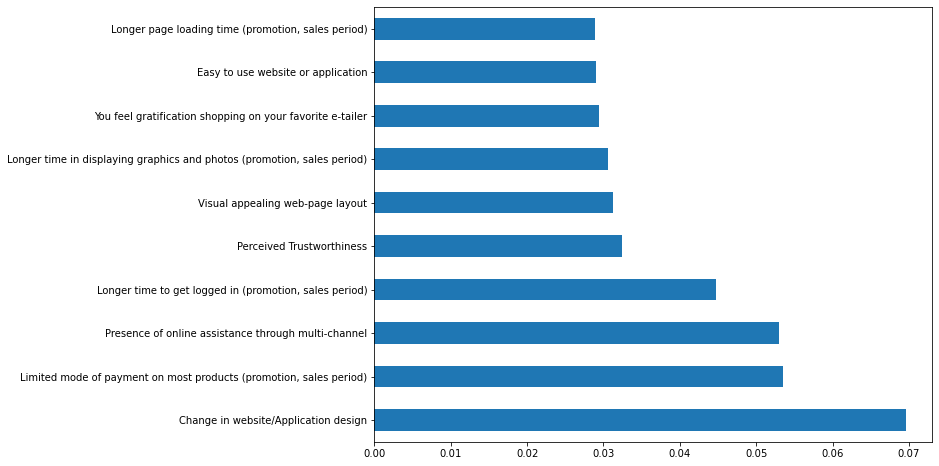

In [51]:
model=rf.fit(x_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_s.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
       

In [52]:
feat_importances.nlargest(10)

Change in website/Application design                                       0.069569
Limited mode of payment on most products (promotion, sales period)         0.053561
Presence of online assistance through multi-channel                        0.052948
Longer time to get logged in (promotion, sales period)                     0.044745
Perceived Trustworthiness                                                  0.032373
Visual appealing web-page layout                                           0.031302
Longer time in displaying graphics and photos (promotion, sales period)    0.030559
You feel gratification shopping on your favorite e-tailer                  0.029356
Easy to use website or application                                         0.029013
Longer page loading time (promotion, sales period)                         0.028869
dtype: float64

# Using Chi2 Test

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(X_s,Y)

In [55]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_s.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  

In [56]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['Features'])

                                             Features      Score
16    Why did you abandon the “Bag”, “Shopping Cart”?  75.754028
22                       Loading and processing speed  59.810983
42  Shopping on the website gives you the sense of...  59.253569
10  What browser do you run on your device to acce...  57.171099
67               Change in website/Application design  55.301526
49                   Visual appealing web-page layout  54.245760
65  Limited mode of payment on most products (prom...  53.269266
61  Longer time to get logged in (promotion, sales...  48.222655
62  Longer time in displaying graphics and photos ...  48.130643
50                   Wild variety of product on offer  47.605973


# Principle Component Analysis

In [57]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_s)

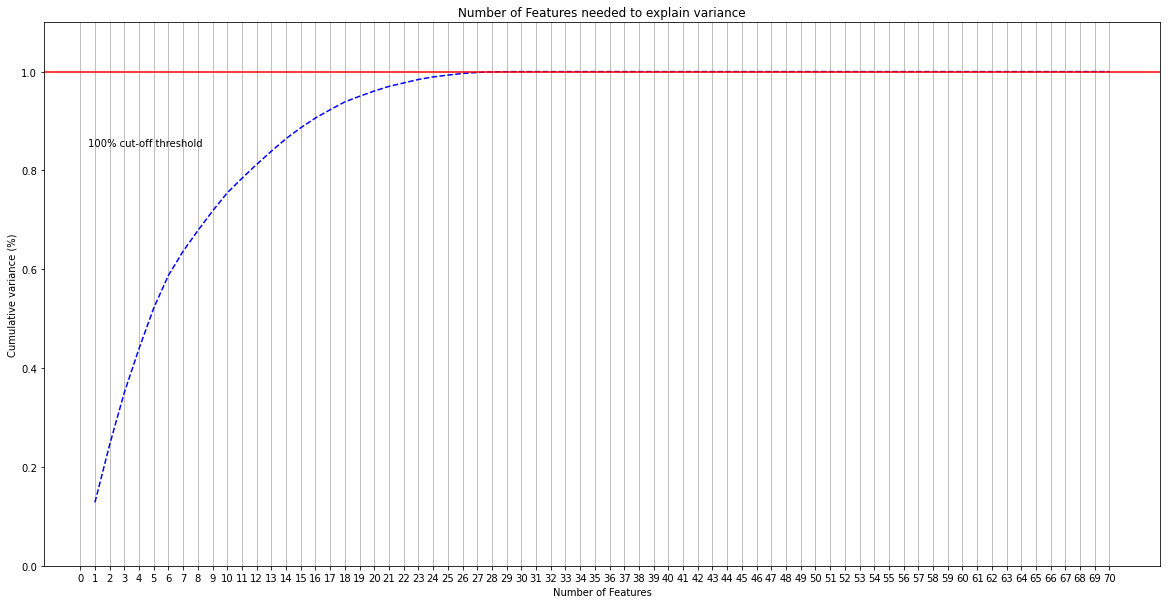

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 71, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, linestyle='--', color='b')

plt.xlabel('Number of Features')
plt.xticks(np.arange(0, 71, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Features needed to explain variance')


plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold')

ax.grid(axis='x')
plt.show()

#From the below graph, we can retain all the information with 29 features

In [59]:
pca=PCA(n_components=29)
x=pca.fit_transform(X_s)
x=pd.DataFrame(x)
x.head()

0         1         2         3         4         5         6   \
0  1.946541 -0.743734 -0.966006 -1.286007  0.588362 -1.080733  0.739167   
1 -0.213017 -1.421970  1.036985  0.651852  0.133270 -0.780494  0.115701   
2  1.497599 -0.264260  0.849143 -1.460875  0.052634  0.824480 -0.790471   
3  0.303836  2.127605  0.834330 -0.178811 -1.322023 -0.104024  0.579047   
4  0.040340 -0.323735  2.363889  0.873679  0.336115 -0.997798 -0.607057   

         7         8         9   ...        19        20        21        22  \
0  0.019570 -0.843779 -0.414839  ... -0.279049 -0.288788 -0.075673 -0.127413   
1 -0.627285  0.060658 -0.309292  ...  0.280971 -0.333454 -0.375708  0.135915   
2  0.090736  0.499790 -0.466788  ... -0.154983  0.016861 -0.233809  0.120610   
3 -0.491646 -0.155686 -0.127113  ...  0.050593 -0.067295 -0.176544  0.052497   
4  0.616638 -0.349911  0.676449  ... -0.046664 -0.041840  0.144122 -0.182385   

         23        24        25        26        27        28  
0 -0.238873  0.167151 -0.168287 -0.181649  0.086961 -0.006720  
1 -0.101962  0.166412  0.196261  0.137411 -0.079176  0.046652  
2 -0.058386  0.094347  0.102966 -0.181896  0.039409  0.027561  
3 -0.032278 -0.141987  0.089710 -0.130575  0.025392 -0.023508  
4 -0.046761 -0.015879  0.219956  0.144401  0.013557 -0.019106  

[5 rows x 29 columns]

# Training Models

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [61]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
lst=[lr,rf,kn,sv,dt,gb]

In [62]:
for i1 in lst:
    for i2 in range(0,4):
        x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=i2,test_size=0.33)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        print("Model",i1,"Random State-",i2,"Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Model LogisticRegression() Random State- 0 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model LogisticRegression() Random State- 1 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model LogisticRegression() Random State- 2 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model LogisticRegression() Random State- 3 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model RandomForestClassifier() Random State- 0 Accuracy Score-Test 0.99 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.99
Model RandomForestClassifier() Random State- 1 Accuracy Score-Test 0.99 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.99
Model RandomForestClassifier() Random State- 2 Accuracy Score-Test 0.99 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.99
Model RandomForestClassifier() Random State- 3 Accuracy Score-Test 1.0 A

From the above results, models which are effective are Logistic Regression, Random Forest, KNeighbors Classifier, SVC.

In [63]:
#Training the Random Forest Model 

rf=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=4,test_size=0.33)

model1=rf.fit(x_train,y_train)

pred_test=model1.predict(x_test)

pred_train=model1.predict(x_train)

In [64]:
#Checking the accuracy score

print(round(accuracy_score(y_test,pred_test),2))

0.99


In [65]:
print(round(accuracy_score(y_train,pred_train),2))

1.0


In [66]:
#Cross-Validation Score

from sklearn.model_selection import cross_val_score
cv=cross_val_score(model1,x,Y,cv=10)
print(round(cv.mean(),2))

0.99


In [30]:
#Confusion Matrix

print(confusion_matrix(y_test,pred_test))

[[21  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  5]]


In [35]:
#Classification Report

print(classification_report(y_test,pred_test))

                                                   precision    recall  f1-score   support

                                        Amazon.in       1.00      1.00      1.00        21
                          Amazon.in, Flipkart.com       1.00      1.00      1.00        26
              Amazon.in, Flipkart.com, Myntra.com       1.00      1.00      1.00         7
                            Amazon.in, Myntra.com       1.00      1.00      1.00        10
                             Amazon.in, Paytm.com       1.00      1.00      1.00         2
                 Amazon.in, Paytm.com, Myntra.com       1.00      1.00      1.00         6
                                     Flipkart.com       1.00      1.00      1.00        12
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com       1.00      1.00      1.00         5

                                         accuracy                           1.00        89
                                        macro avg       1.00      1.00      1.00        

# Saving Model

In [67]:
import pickle
pickle.dump(model1, open('E-Retail_Model', 'wb'))

In [80]:
pred_final=[]
pickled_model=pickle.load(open('E-Retail_Model', 'rb'))
pred_final=pickled_model.predict(x_test)

In [109]:
predicted=list(pred_final)
true=y_test["Which of the Indian online retailer would you recommend to a friend?"].to_list()

In [116]:
dfnew=pd.DataFrame(list(zip(predicted,true)),columns =['Predicted Value','True Value'])

In [117]:
dfnew

Predicted Value                           True Value
0               Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
1                             Amazon.in                            Amazon.in
2               Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
3   Amazon.in, Flipkart.com, Myntra.com  Amazon.in, Flipkart.com, Myntra.com
4               Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
..                                  ...                                  ...
84              Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
85                            Amazon.in                            Amazon.in
86              Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
87              Amazon.in, Flipkart.com              Amazon.in, Flipkart.com
88                            Amazon.in                            Amazon.in

[89 rows x 2 columns]